# An√°lisis Espaciotemporal del Rendimiento del Arroz secnao Mecanizado en Colombia (2006‚Äì2023)

## Introducci√≥n

El arroz es uno de los cultivos m√°s importantes para la seguridad alimentaria en Colombia, en los departamentos donde se concentra una parte significativa de la producci√≥n nacional bajo condiciones mecanizadas. En el contexto del cambio clim√°tico, resulta fundamental analizar c√≥mo ha variado el rendimiento del arroz en relaci√≥n con factores ambientales y clim√°ticos.

Este cuaderno busca integrar informaci√≥n de distintas fuentes oficiales para observar el comportamiento temporal del rendimiento del arroz mecanizado en Colombia, y establecer una base para su an√°lisis geoespacial.

## Objetivo

Evaluar el comportamiento del rendimiento del arroz MECANIZADO en Colombia desde 2006 hasta 2023, con √©nfasis en los departamentos de Colombia, identificando patrones, variaciones y posibles relaciones con condiciones clim√°ticas a nivel nacional y departamental.

## Preguntas de investigaci√≥n
¬øC√≥mo se distribuye espacial y temporalmente la precipitaci√≥n en las zonas arroceras del pa√≠s?

¬øQu√© relaci√≥n existe entre las anomal√≠as de precipitaci√≥n y los rendimientos de arroz?

¬øCu√°les regiones presentan mayor vulnerabilidad clim√°tica para el cultivo de arroz?

## Fuentes de datos

- **Agronet**: Datos departamentales de √°rea sembrada, producci√≥n y rendimiento del arroz de riego en Colombia (2006‚Äì2023).
- https://www.agronet.gov.co/estadistica/Paginas/home.aspx?cod=3
- https://www.agronet.gov.co/estadistica/Paginas/home.aspx?cod=1
- **FAO (FAOSTAT)**: Datos agregados nacionales de √°rea cosechada, producci√≥n y rendimiento del arroz (2001‚Äì2023).
- https://www.fao.org/faostat/en/#data/QCL
- **SIPRA** https://sipra.upra.gov.co/nacional/consulta-documentos
- **Variables clim√°ticas**: Pendiente de integraci√≥n. Se planea utilizar informaci√≥n de temperatura y precipitaci√≥n proveniente de CHIRPS, ERA5, MOD16A2, NDVI (MODIS)

## Estructura del an√°lisis

1. **Carga y limpieza de los datos**
2. **Exploraci√≥n estad√≠stica y visualizaci√≥n**
3. **Comparaci√≥n de datos Agronet vs. FAO**
4. **An√°lisis por departamento (Tolima y Huila)**
5. **Tendencias nacionales del rendimiento**
6. **Preparaci√≥n de datos para an√°lisis con clima (por integrar)**

---



### 1. Carga y limpieza de los datos
Se obtienen datos de rendimientos de cultivo de arroz mecanizado en diferentes departamentos de Colombia de Agronet, y valores de rendimientos de cultivo de todo Colombia por a√±o de la FAO
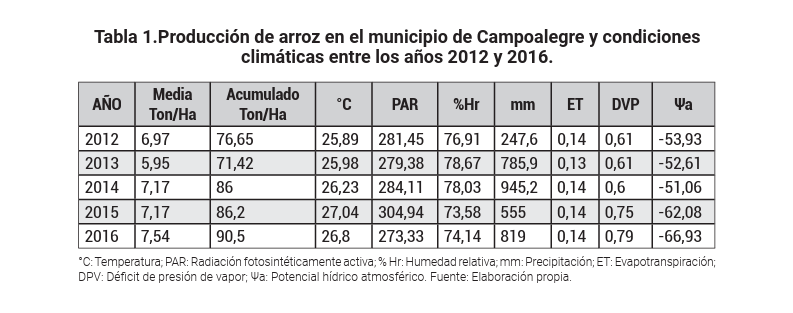

Leer datos

In [1]:
import pandas as pd

# Ruta al archivo
ruta_archivo = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer la hoja 'BaseDatosArroz' usando la segunda fila como encabezado
df = pd.read_excel(ruta_archivo, sheet_name='Sheet1', header=0)

# Mostrar las primeras filas
print(df.head())



  Departamento    Area      Rend   A√±o Semestre Rend_Cuartil  \
0         Meta   620.0  0.050757  2013        I         Bajo   
1         Meta   620.0  0.036582  2013       II         Bajo   
2     Casanare  6358.6  0.343188  2013        I         Bajo   
3     Casanare  6358.6  0.307771  2013       II         Bajo   
4         Meta  7572.1  0.619896  2013        I   Medio-Alto   

   Bajo_Rendimiento municipio_norm semester_GEE  precip_accum_mm  \
0                 1        ACACIAS          1-6      1771.063271   
1                 1        ACACIAS         7-12      1895.331576   
2                 1        AGUAZUL          1-6       921.609069   
3                 1        AGUAZUL         7-12      1235.895755   
4                 0       CABUYARO          1-6      1231.824421   

  municipio_fao  precipitacion_alta       lat        lon  \
0       Acacias                   1  4.009658 -73.723954   
1       Acacias                   1  4.009658 -73.723954   
2       Aguazul          

In [2]:
print(df.info())
print(df.describe())
# Eliminar registros sin datos √∫tiles
df = df[(df['Area'] > 0) & (df['Rend'] > 0)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Departamento        654 non-null    object 
 1   Area                654 non-null    float64
 2   Rend                654 non-null    float64
 3   A√±o                 654 non-null    int64  
 4   Semestre            654 non-null    object 
 5   Rend_Cuartil        654 non-null    object 
 6   Bajo_Rendimiento    654 non-null    int64  
 7   municipio_norm      654 non-null    object 
 8   semester_GEE        654 non-null    object 
 9   precip_accum_mm     654 non-null    float64
 10  municipio_fao       654 non-null    object 
 11  precipitacion_alta  654 non-null    int64  
 12  lat                 654 non-null    float64
 13  lon                 654 non-null    float64
 14  geometry            654 non-null    object 
dtypes: float64(5), int64(3), object(7)
memory usage: 76.8+ K

## Distribuci√≥n del rendimiento

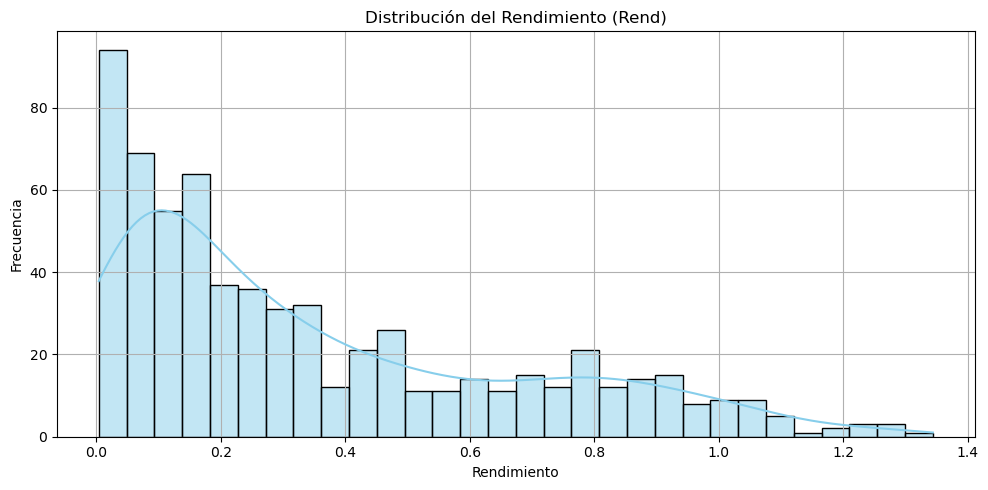

C:\Users\paola\AppData\Local\Temp\ipykernel_25688\3734482479.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bajo_Rendimiento', data=df, palette='Set2')


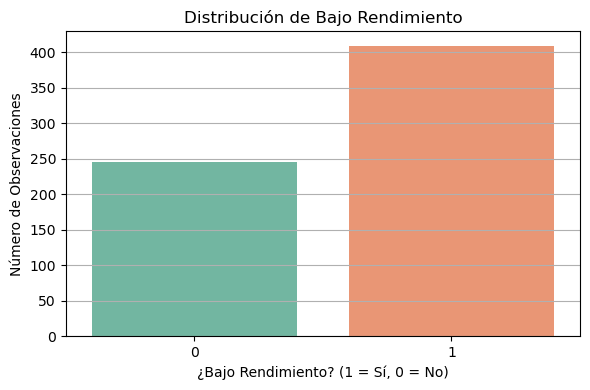

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel
archivo = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(archivo)

# Reemplazar comas por puntos si 'Rend' est√° como texto
df['Rend'] = df['Rend'].astype(str).str.replace(',', '.').astype(float)

# Gr√°fico 1: Distribuci√≥n de Rendimiento (Rend)
plt.figure(figsize=(10, 5))
sns.histplot(df['Rend'], kde=True, bins=30, color='skyblue')
plt.title("Distribuci√≥n del Rendimiento (Rend)")
plt.xlabel("Rendimiento")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gr√°fico 2: Conteo de Bajo_Rendimiento
plt.figure(figsize=(6, 4))
sns.countplot(x='Bajo_Rendimiento', data=df, palette='Set2')
plt.title("Distribuci√≥n de Bajo Rendimiento")
plt.xlabel("¬øBajo Rendimiento? (1 = S√≠, 0 = No)")
plt.ylabel("N√∫mero de Observaciones")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## Desproporci√≥n de los datos (variable binaria de rendimiento)
¬øQu√© puedes hacer?
Medir el desempe√±o con m√©tricas apropiadas, no solo accuracy:

precision, recall, f1-score, ROC-AUC.

(Opcional) Balancear las clases si fuera necesario:

Con t√©cnicas como:

class_weight='balanced' en LogisticRegression.

Oversampling (ej. SMOTE) o undersampling.

Mantener la proporci√≥n original si tu objetivo es interpretar el comportamiento real (por ejemplo, identificar municipios en riesgo de bajo rendimiento).

## Anexar coordenadas a los municipios - exploraci√≥n de shapefile

Importante mejorar el c√≥digo para que busque o extraiga coordenadas de la web -- HECHO!!!

## Construir un dataframe con solo los municipios que necesito ------- VOLVER A REPETIR ------ DESCARGARON MAL LOS VALORES DE GEE


## GRAFICAR DATOS DE PRECIPITACI√ìN PARA ENTENDER VALORES ------ PENDIENTE VOLVER A DESCARGAR POR ANOMAL√çAS EN LOS DATOS

## GENERACI√ìN DE DATOS DE PRECIPITACI√ìN ALEATORIA PARA CONSTRUIR EL C√ìDIGO DE LA REGRESI√ìN LOG√çSTICA MIENTRAS QUE LOGRO TENER LOS DATOS DE PRECIPITACI√ìN REAL

Adem√°s, el arroz requiere m√°s agua que cualquier otro cultivo. Como resultado, el cultivo de arroz solo se realiza en aquellas √°reas donde la precipitaci√≥n m√≠nima es de 115 cm. Aunque las regiones est√°n teniendo un promedio anual de lluvia entre 175 a 300 cm, son las m√°s adecuadas. Tambi√©n necesita condiciones de inundaci√≥n con la profundidad del agua que var√≠a m√°s de 25 mm, en el momento del trasplante hasta 150 mm, durante 10 semanas del per√≠odo de crecimiento. (SAG, 2010) (Secretar√≠a de Agricultura y Ganader√≠a, SAG, 2010)

#### CRITERIO DE EXCESO DE AGUA: VALORES MAYORES A 300 cm O 3000 mm ANUALES, ES DECIR 1500 mm SEMESTRALES

# An√°lisis de Precipitaci√≥n para Municipios de Meta y Casanare (2013-2023)

Para evaluar el balance h√≠drico asociado al cultivo de arroz en los departamentos de Meta y Casanare, se seleccionaron 31 municipios que cuentan con datos de rendimiento agr√≠cola reportados por Fedearroz durante el periodo 2013-2023. Estos municipios son:

**Granada, Villanueva, Puerto Rico, Aguazul, Hato Corozal, Mani, Nunch√≠a, Orocu√©, Paz de Ariporo, Pore, San Luis de Palenque, Tauramena, Trinidad, Yopal, San Mart√≠n, Acac√≠as, Cabuyaro, Castilla la Nueva, Cumaral, El Castillo, Fuente de Oro, Lejan√≠as, Puerto Concordia, Puerto Gait√°n, Puerto Lleras, Puerto L√≥pez, Restrepo, San Carlos de Guaroa, San Juan de Arama, Villavicencio, Vistahermosa.**

---

## Metodolog√≠a

1. **Carga y filtrado espacial de municipios**  
   Se utiliz√≥ la capa oficial de municipios de Colombia (FAO GAUL 2015, nivel 2) y se filtraron √∫nicamente los municipios listados anteriormente pertenecientes a Meta y Casanare. Esto garantiza la correspondencia con los datos de rendimiento agr√≠cola disponibles.

2. **Obtenci√≥n de datos de precipitaci√≥n diaria**  
   Se emple√≥ la colecci√≥n CHIRPS (`UCSB-CHG/CHIRPS/DAILY`), que proporciona registros satelitales diarios de precipitaci√≥n con cobertura adecuada para los municipios de inter√©s en el periodo 2013-2023.

3. **Agregaci√≥n temporal semestral de precipitaci√≥n**  
   Se definieron dos semestres por a√±o: enero-junio y julio-diciembre. Para cada semestre, se sumaron las precipitaciones diarias para obtener la precipitaci√≥n acumulada del periodo.

4. **C√°lculo espacial del promedio de precipitaci√≥n**  
   Para cada semestre y municipio, se calcul√≥ la precipitaci√≥n promedio acumulada (en mil√≠metros) dentro de la geometr√≠a municipal, utilizando un reductor espacial de promedio en Google Earth Engine (GEE).

5. **Exportaci√≥n y an√°lisis posterior**  
   Los resultados se consolidaron en una tabla que incluye: departamento, municipio, a√±o, semestre y precipitaci√≥n acumulada promedio. Esta informaci√≥n ser√° integrada con los datos de rendimiento agr√≠cola para futuros an√°lisis estad√≠sticos y modelaci√≥n de la influencia de la precipitaci√≥n en el cultivo de arroz.

---

Este an√°lisis proporciona una base cuantitativa para evaluar el balance h√≠drico requerido por el cultivo de arroz en estas regiones, lo que es fundamental para la validaci√≥n de condiciones clim√°ticas y el desarrollo de modelos predictivos de rendimiento agr√≠cola.


https://code.earthengine.google.com/ac704b48dc574a7431271aa11694a33d


In [4]:
import pandas as pd

# Ruta del archivo
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\Precipitacion_promedio_semestre_Meta_Casanare_2013_2023.csv"

# Leer el archivo CSV
df = pd.read_csv(ruta)

# Mostrar primeras filas
print("Primeras filas del archivo:")
print(df.head())

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Convertir 'year' a entero si es necesario
df['year'] = df['year'].astype(int)

# ---------------------
# ESTAD√çSTICAS GENERALES
# ---------------------
print("\nResumen estad√≠stico general:")
print(df['precip_accum_avg_mm'].describe())

promedio_total = df['precip_accum_avg_mm'].mean()
print(f"\nPromedio total de precipitaci√≥n acumulada: {promedio_total:.2f} mm")

# ---------------------
# PROMEDIO POR MUNICIPIO
# ---------------------
promedio_por_municipio = df.groupby('municipio')['precip_accum_avg_mm'].mean().sort_values(ascending=False)
print("\nPromedio por municipio:")
print(promedio_por_municipio)

# ---------------------
# PROMEDIO POR DEPARTAMENTO
# ---------------------
promedio_por_departamento = df.groupby('departamento')['precip_accum_avg_mm'].mean()
print("\nPromedio por departamento:")
print(promedio_por_departamento)

# ---------------------
# PROMEDIO POR A√ëO
# ---------------------
promedio_por_ano = df.groupby('year')['precip_accum_avg_mm'].mean()
print("\nPromedio por a√±o:")
print(promedio_por_ano)

# ---------------------
# PROMEDIO POR SEMESTRE (A√ëO + SEMESTRE)
# ---------------------
promedio_por_semestre = df.groupby(['year', 'semester'])['precip_accum_avg_mm'].mean()
print("\nPromedio por a√±o y semestre:")
print(promedio_por_semestre)


Primeras filas del archivo:
  departamento     municipio    year semester  precip_accum_avg_mm
0     Casanare       Aguazul  2013.0      1-6           921.609069
1     Casanare  Hato Corozal  2013.0      1-6           835.941310
2     Casanare          Mani  2013.0      1-6           942.316088
3     Casanare       Nunchia  2013.0      1-6           801.662371
4     Casanare        Orocue  2013.0      1-6           966.614371

Tipos de datos:
departamento            object
municipio               object
year                   float64
semester                object
precip_accum_avg_mm    float64
dtype: object

Resumen estad√≠stico general:
count     682.000000
mean     1377.233011
std       326.255957
min       561.006110
25%      1160.743772
50%      1390.012769
75%      1585.161854
max      2455.538822
Name: precip_accum_avg_mm, dtype: float64

Promedio total de precipitaci√≥n acumulada: 1377.23 mm

Promedio por municipio:
municipio
Restrepo                1835.459439
Castilla La Nuev

## An√°lisis del Requerimiento H√≠drico para el Cultivo de Arroz

El cultivo de arroz es altamente dependiente del agua y requiere condiciones espec√≠ficas para un desarrollo √≥ptimo. Seg√∫n la Secretar√≠a de Agricultura y Ganader√≠a (SAG, 2010), el arroz necesita:

- Un m√≠nimo de **1150 mm de precipitaci√≥n anual** para asegurar un crecimiento adecuado.
- Condiciones de inundaci√≥n controlada con una profundidad de agua variable entre **25 mm y 150 mm** durante aproximadamente **10 semanas** del per√≠odo de crecimiento, especialmente desde el trasplante.

---

## Evaluaci√≥n de los Resultados de Precipitaci√≥n

A partir de los datos procesados en Google Earth Engine, se calcularon las precipitaciones promedio semestrales y anuales para los 31 municipios con datos de rendimiento agr√≠cola de Fedearroz entre 2013 y 2023. Los promedios obtenidos indican que:

- La suma de las precipitaciones promedio de ambos semestres de un a√±o supera el m√≠nimo requerido de 1150 mm para el arroz en la mayor√≠a de los casos.
- Esto sugiere que, desde el punto de vista pluviom√©trico, la disponibilidad de agua es suficiente para el cultivo en estas regiones.
- Sin embargo, se debe considerar que el promedio anual puede ocultar variaciones estacionales importantes, por lo que un an√°lisis detallado por semestre es crucial para evaluar periodos de d√©ficit o exceso de agua.

---

## Pr√≥ximos Pasos en el An√°lisis

- Integrar los datos de precipitaci√≥n promedio semestral y anual con los datos de rendimiento agr√≠cola para construir un modelo de regresi√≥n que permita evaluar la relaci√≥n entre variables clim√°ticas y productividad.
- Ajustar y validar el modelo considerando la variabilidad temporal y espacial de la precipitaci√≥n y otros factores ambientales.
- Establecer umbrales de precipitaci√≥n e inundaci√≥n que influyan significativamente en el rendimiento del cultivo, para orientar estrategias de manejo y adaptaci√≥n agr√≠cola.

Este enfoque permitir√° avanzar hacia una comprensi√≥n m√°s precisa de c√≥mo las condiciones clim√°ticas afectan el cultivo de arroz y ayudar√° a tomar decisiones basadas en evidencia para mejorar la productividad y sostenibilidad en las regiones estudiadas.


In [5]:
import pandas as pd
import unidecode

# Funci√≥n para normalizar nombres (sin tildes, may√∫sculas, sin espacios extremos)
def normalizar(texto):
    if pd.isna(texto):
        return ""
    texto = unidecode.unidecode(texto).upper().strip()
    return texto

# Rutas de los archivos
csv_path = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\Precipitacion_promedio_semestre_Meta_Casanare_2013_2023.csv"
xlsx_path = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_municipio_fao.xlsx"

# Leer datos
df_csv = pd.read_csv(csv_path)
df_xlsx = pd.read_excel(xlsx_path)

# Normalizar nombres municipios
df_csv['municipio_norm'] = df_csv['municipio'].apply(normalizar)
df_xlsx['municipio_norm'] = df_xlsx['municipio_fao'].apply(normalizar)

# Asegurar que 'year' y 'semester' sean del mismo tipo y formato
df_csv['year'] = df_csv['year'].astype(int)
df_xlsx['year'] = df_xlsx['year'].astype(int)

# Opcional: uniformizar semester, en caso que tenga formato distinto (por ejemplo 1-6)
df_csv['semester'] = df_csv['semester'].astype(str).str.strip()
df_xlsx['semester'] = df_xlsx['semester'].astype(str).str.strip()

# Merge por municipio_norm, year y semester para comparar precipitaci√≥n
df_merged = pd.merge(
    df_xlsx[['municipio_norm', 'year', 'semester', 'precip_accum_avg_mm']],
    df_csv[['municipio_norm', 'year', 'semester', 'precip_accum_avg_mm']],
    on=['municipio_norm', 'year', 'semester'],
    suffixes=('_xlsx', '_csv'),
    how='inner'  # solo municipios y periodos que aparecen en ambos
)

# Calcular diferencia entre precipitaciones
df_merged['diferencia_precip'] = df_merged['precip_accum_avg_mm_xlsx'] - df_merged['precip_accum_avg_mm_csv']

# Mostrar algunas filas para inspecci√≥n
print(df_merged.head())

# Guardar resultado a Excel si quieres
df_merged.to_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\Comparacion_Precipitacion.xlsx", index=False)


KeyError: 'year'

In [ ]:
import pandas as pd

# Ruta del archivo
xlsx_path = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_municipio_fao.xlsx"

# Cargar el archivo Excel
df = pd.read_excel(xlsx_path)

# Verificar las columnas para asegurarnos que la columna existe
print(df.columns)

# Crear la columna "precipitacion_alta"
df['precipitacion_alta'] = (df['precip_accum_avg_mm'] > 1500).astype(int)

# Guardar el resultado en un nuevo archivo para no sobrescribir
output_path = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta.xlsx"
df.to_excel(output_path, index=False)

print("Archivo guardado con la nueva columna 'precipitacion_alta'.")


## REGRESI√ìN LOG√çSTICA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Leer el archivo Excel
df = pd.read_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx")

# Corregir decimales en 'Area' y 'precip_accum_avg_mm'
df['Area'] = df['Area'].apply(lambda x: float(str(x).replace(',', '.')))
df['precip_accum_avg_mm'] = df['precip_accum_avg_mm'].apply(lambda x: float(str(x).replace(',', '.')))

# Convertir 'A√±o' y 'Semestre' a string para codificaci√≥n categ√≥rica
df['A√±o'] = df['A√±o'].astype(str)
df['Semestre'] = df['Semestre'].astype(str)

# Eliminar filas con valores faltantes en columnas clave
df = df.dropna(subset=['Departamento', 'Area', 'A√±o', 'Semestre', 'precip_accum_avg_mm', 'precipitacion_alta', 'Bajo_Rendimiento'])

# Variables independientes
X = df[['Departamento', 'Area', 'A√±o', 'Semestre', 'precip_accum_avg_mm', 'precipitacion_alta']]
y = df['Bajo_Rendimiento']

# Preprocesamiento: OneHotEncoder para las variables categ√≥ricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Departamento', 'A√±o', 'Semestre'])
    ],
    remainder='passthrough'  # deja Area, precip_accum_avg_mm y precipitacion_alta sin transformar
)

X_processed = preprocessor.fit_transform(X)

# Divisi√≥n en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, stratify=y, random_state=42
)

# Entrenar modelo de regresi√≥n log√≠stica
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluaci√≥n
print("Matriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Leer el archivo Excel
df = pd.read_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx")

# Corregir decimales en 'Area' y 'precip_accum_mm'
df['Area'] = df['Area'].apply(lambda x: float(str(x).replace(',', '.')))
df['precip_accum_mm'] = df['precip_accum_mm'].apply(lambda x: float(str(x).replace(',', '.')))

# Convertir 'A√±o' y 'Semestre' a string para codificaci√≥n categ√≥rica
df['A√±o'] = df['A√±o'].astype(str)
df['Semestre'] = df['Semestre'].astype(str)

# Eliminar filas con valores faltantes en columnas clave
df = df.dropna(subset=['Departamento', 'Area', 'A√±o', 'Semestre', 'precip_accum_mm', 'precipitacion_alta', 'Bajo_Rendimiento'])

# Explicaci√≥n variables
print("\n### Variables usadas en el modelo de regresi√≥n log√≠stica:\n")
print("- **Variables independientes (X):**")
print("  - Departamento (categ√≥rica): regi√≥n administrativa del cultivo.")
print("  - √Årea (num√©rica): extensi√≥n del √°rea cultivada.")
print("  - A√±o (categ√≥rica): a√±o de registro de los datos.")
print("  - Semestre (categ√≥rica): semestre del a√±o.")
print("  - Precipitaci√≥n acumulada (num√©rica): cantidad promedio de lluvia acumulada.")
print("  - Variable binaria de alta precipitaci√≥n (precipitacion_alta): indica si hubo alta precipitaci√≥n.\n")
print("- **Variable dependiente (y):**")
print("  - Bajo_Rendimiento (binaria): indica si el rendimiento del cultivo fue bajo (1) o no (0).\n")

# Variables independientes y dependientes
X = df[['Departamento', 'Area', 'A√±o', 'Semestre', 'precip_accum_mm', 'precipitacion_alta']]
y = df['Bajo_Rendimiento']

# Preprocesamiento: OneHotEncoder para variables categ√≥ricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Departamento', 'A√±o', 'Semestre'])
    ],
    remainder='passthrough'  # deja variables num√©ricas sin modificar
)
X_processed = preprocessor.fit_transform(X)

print("Preprocesamiento: Las variables categ√≥ricas 'Departamento', 'A√±o' y 'Semestre' se codifican con OneHotEncoder, eliminando la primera categor√≠a para evitar multicolinealidad.\n")

# Divisi√≥n de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, stratify=y, random_state=42
)
print("Divisi√≥n de datos:")
print(f"- Tama√±o conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"- Tama√±o conjunto de prueba: {X_test.shape[0]} muestras\n")

# Entrenar el modelo de regresi√≥n log√≠stica
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)
print("Modelo de regresi√≥n log√≠stica entrenado con los datos de entrenamiento.\n")

# Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluaci√≥n
print("Resultados del modelo:\n")

print("Matriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

print("\nInterpretaci√≥n:")
print("- La matriz de confusi√≥n muestra la cantidad de aciertos y errores del modelo en cada categor√≠a.")
print("- El reporte de clasificaci√≥n da m√©tricas de precisi√≥n, recall y F1-score para cada clase.")
print("- El ROC AUC Score indica la capacidad del modelo para distinguir entre las clases, siendo 1 perfecto y 0.5 un modelo aleatorio.\n")


### Variables usadas en el modelo de regresi√≥n log√≠stica:

- **Variables independientes (X):**
  - Departamento (categ√≥rica): regi√≥n administrativa del cultivo.
  - √Årea (num√©rica): extensi√≥n del √°rea cultivada.
  - A√±o (categ√≥rica): a√±o de registro de los datos.
  - Semestre (categ√≥rica): semestre del a√±o.
  - Precipitaci√≥n acumulada (num√©rica): cantidad promedio de lluvia acumulada.
  - Variable binaria de alta precipitaci√≥n (precipitacion_alta): indica si hubo alta precipitaci√≥n.

- **Variable dependiente (y):**
  - Bajo_Rendimiento (binaria): indica si el rendimiento del cultivo fue bajo (1) o no (0).

Preprocesamiento: Las variables categ√≥ricas 'Departamento', 'A√±o' y 'Semestre' se codifican con OneHotEncoder, eliminando la primera categor√≠a para evitar multicolinealidad.

Divisi√≥n de datos:
- Tama√±o conjunto de entrenamiento: 457 muestras
- Tama√±o conjunto de prueba: 197 muestras

In [ ]:
print(df.columns.tolist())
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Leer el archivo Excel
df = pd.read_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx")

# Corregir decimales en 'Area' y 'precip_accum_mm'
df['Area'] = df['Area'].apply(lambda x: float(str(x).replace(',', '.')))
df['precip_accum_mm'] = df['precip_accum_mm'].apply(lambda x: float(str(x).replace(',', '.')))

# Convertir 'A√±o' y 'Semestre' a string para codificaci√≥n categ√≥rica
df['A√±o'] = df['A√±o'].astype(str)
df['Semestre'] = df['Semestre'].astype(str)

# Eliminar filas con valores faltantes en columnas clave
df = df.dropna(subset=['Departamento', 'Area', 'A√±o', 'Semestre', 'precip_accum_mm', 'precipitacion_alta', 'Bajo_Rendimiento'])

# Explicaci√≥n variables
print("\n### Variables usadas en el modelo de regresi√≥n log√≠stica:\n")
print("- **Variables independientes (X):**")
print("  - Departamento (categ√≥rica): regi√≥n administrativa del cultivo.")
print("  - √Årea (num√©rica): extensi√≥n del √°rea cultivada.")
print("  - A√±o (categ√≥rica): a√±o de registro de los datos.")
print("  - Semestre (categ√≥rica): semestre del a√±o.")
print("  - Precipitaci√≥n acumulada (num√©rica): cantidad promedio de lluvia acumulada.")
print("  - Variable binaria de alta precipitaci√≥n (precipitacion_alta): indica si hubo alta precipitaci√≥n.\n")
print("- **Variable dependiente (y):**")
print("  - Bajo_Rendimiento (binaria): indica si el rendimiento del cultivo fue bajo (1) o no (0).\n")

# Variables independientes y dependientes
X = df[['Departamento', 'Area', 'A√±o', 'Semestre', 'precip_accum_mm', 'precipitacion_alta']]
y = df['Bajo_Rendimiento']

# Preprocesamiento: OneHotEncoder para variables categ√≥ricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Departamento', 'A√±o', 'Semestre'])
    ],
    remainder='passthrough'  # deja variables num√©ricas sin modificar
)
X_processed = preprocessor.fit_transform(X)

print("Preprocesamiento: Las variables categ√≥ricas 'Departamento', 'A√±o' y 'Semestre' se codifican con OneHotEncoder, eliminando la primera categor√≠a para evitar multicolinealidad.\n")

# Divisi√≥n de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, stratify=y, random_state=42
)
print("Divisi√≥n de datos:")
print(f"- Tama√±o conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"- Tama√±o conjunto de prueba: {X_test.shape[0]} muestras\n")

# Entrenar el modelo de regresi√≥n log√≠stica
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)
print("Modelo de regresi√≥n log√≠stica entrenado con los datos de entrenamiento.\n")

# Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluaci√≥n
print("Resultados del modelo:\n")

print("Matriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

print("\nInterpretaci√≥n:")
print("- La matriz de confusi√≥n muestra la cantidad de aciertos y errores del modelo en cada categor√≠a.")
print("- El reporte de clasificaci√≥n da m√©tricas de precisi√≥n, recall y F1-score para cada clase.")
print("- El ROC AUC Score indica la capacidad del modelo para distinguir entre las clases, siendo 1 perfecto y 0.5 un modelo aleatorio.\n")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'])
plt.xlabel("Coeficiente (influencia en la probabilidad de Bajo_Rendimiento)")
plt.title("Importancia de Variables en la Regresi√≥n Log√≠stica")
plt.gca().invert_yaxis()
plt.tight_layout()

# Guardar antes de mostrar
plt.savefig("importancia_variables_regresion_logistica.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## TABLA DE COEFICIENTES DEL MODELO

In [ ]:
feature_names = preprocessor.get_feature_names_out()
coefs = modelo.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
print(coef_df.sort_values(by='Coefficient', ascending=False))


### üìå Interpretaci√≥n de los Coeficientes del Modelo de Regresi√≥n Log√≠stica

La regresi√≥n log√≠stica estima la probabilidad de que un cultivo tenga **bajo rendimiento** (`Bajo_Rendimiento = 1`) en funci√≥n de diversas variables. A continuaci√≥n, se resumen las interpretaciones clave de los coeficientes obtenidos:

#### üî∫ Variables que AUMENTAN la probabilidad de bajo rendimiento
- **A√±o 2021, 2022 y 2023**: Presentan coeficientes positivos, lo que indica una mayor probabilidad de bajo rendimiento en comparaci√≥n con el a√±o base.
- **Semestre II**: El segundo semestre del a√±o est√° asociado con un mayor riesgo de bajo rendimiento.
- **Precipitaci√≥n alta (`precipitacion_alta`)**: Cuando se clasifica la precipitaci√≥n como alta, se incrementa la probabilidad de bajo rendimiento.

#### üîª Variables que DISMINUYEN la probabilidad de bajo rendimiento
- **Departamento Meta**: Presenta un coeficiente altamente negativo, lo que sugiere que los cultivos en este departamento tienen significativamente menos riesgo de bajo rendimiento.
- **A√±os 2014, 2015 y 2018**: Estos a√±os est√°n asociados con un menor riesgo respecto al a√±o base.
- **√Årea sembrada (`Area`) y precipitaci√≥n acumulada (`precip_accum_avg_mm`)**: Tienen coeficientes negativos peque√±os, lo que sugiere que valores m√°s altos en estas variables est√°n levemente asociados con una menor probabilidad de bajo rendimiento.

#### üéØ Conclusi√≥n
El modelo indica que los **factores temporales (a√±o y semestre)** y la **presencia de precipitaciones altas** son m√°s determinantes en la ocurrencia de bajo rendimiento que las variables continuas. Adem√°s, el **Departamento Meta** podr√≠a actuar como un factor protector contra el bajo rendimiento en los cultivos de arroz.


In [ ]:
import geopandas as gpd

# Ruta al archivo GeoPackage
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"

# Cargar la capa 'Munpio'
gdf = gpd.read_file(ruta, layer='Munpio')

# Mostrar las primeras filas
print(gdf.head())

# Verificar columnas disponibles
print("\nColumnas disponibles:")
print(gdf.columns)



Problema de los nombres en las bases de datos: Fuente de Oro vs Fuentedeoro

## Geopackage: https://www.colombiaenmapas.gov.co/?e=-82.43784778320864,-0.17644239911865092,-71.23179309571162,9.90326984502256,4686&b=igac&u=0&t=23&servicio=204

In [ ]:
import geopandas as gpd
import pandas as pd
import unicodedata

# Funci√≥n para normalizar texto (quita espacios, tildes y pasa a may√∫sculas)
def normalizar(texto):
    if isinstance(texto, str):
        texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
        return texto.replace(" ", "").upper()
    return texto

# Rutas
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta.xlsx"

# Leer capa 'Munpio'
gdf = gpd.read_file(ruta_gpkg, layer='Munpio')

# Normalizamos municipio y departamento en geopackage
gdf['municipio_norm_gpkg'] = gdf['MpNombre'].apply(normalizar)
gdf['departamento_norm'] = gdf['Depto'].apply(normalizar)

# Filtrar solo los municipios de Meta y Casanare
gdf_filtrado = gdf[gdf['departamento_norm'].isin(['META', 'CASANARE'])].copy()

# Proyectar a lat/lon para extraer centroides correctamente
gdf_latlon = gdf_filtrado.to_crs(epsg=4326)
gdf_latlon['centroide'] = gdf_latlon.geometry.centroid
gdf_latlon['lat'] = gdf_latlon['centroide'].y
gdf_latlon['lon'] = gdf_latlon['centroide'].x

# Leer el Excel
df_excel = pd.read_excel(ruta_excel)

# Normalizar municipios del Excel
df_excel['municipio_norm_norm'] = df_excel['municipio_norm'].apply(normalizar)

# Merge usando solo municipios de Meta y Casanare
df_merge = df_excel.merge(
    gdf_latlon[['municipio_norm_gpkg', 'lat', 'lon', 'geometry']],
    left_on='municipio_norm_norm',
    right_on='municipio_norm_gpkg',
    how='left'
)

# Limpiar columnas auxiliares
df_merge = df_merge.drop(columns=['municipio_norm_norm', 'municipio_norm_gpkg'])

# Guardar resultado
ruta_guardado = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df_merge.to_excel(ruta_guardado, index=False)

print(f"‚úÖ Archivo guardado con coordenadas y geometr√≠as en: {ruta_guardado}")



## Densidad de kernel

In [ ]:
import fiona

ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"

capas = fiona.listlayers(ruta_gpkg)
print("Capas disponibles en el geopackage:")
for capa in capas:
    print(capa)



In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Rutas
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# 1. Leer capa municipios
gdf_municipios = gpd.read_file(ruta_gpkg, layer='Munpio')

# 2. Agrupar por departamento para hacer pol√≠gonos de departamentos (uniones)
gdf_departamentos = gdf_municipios.dissolve(by='Depto')

# 3. Leer excel con los datos
df = pd.read_excel(ruta_excel)

# 4. Filtrar solo eventos con Bajo_Rendimiento == 1
df_eventos = df[df['Bajo_Rendimiento'] == 1]

# 5. Convertir df_eventos a GeoDataFrame con lat/lon (EPSG 4326 WGS84)
gdf_eventos = gpd.GeoDataFrame(
    df_eventos,
    geometry=gpd.points_from_xy(df_eventos['lon'], df_eventos['lat']),
    crs="EPSG:4326"
)

# 6. Reproyectar ambos a un CRS com√∫n para graficar (por ejemplo EPSG:4326)
gdf_departamentos = gdf_departamentos.to_crs(epsg=4326)
gdf_eventos = gdf_eventos.to_crs(epsg=4326)

# 7. Graficar
fig, ax = plt.subplots(figsize=(10, 10))
gdf_departamentos.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
gdf_eventos.plot(ax=ax, color='red', markersize=20, alpha=0.7, label='Bajo Rendimiento')

ax.set_title("Eventos de Bajo Rendimiento sobre contornos de Departamentos")
ax.legend()
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Filtrar eventos con Bajo_Rendimiento == 1
gdf_eventos = df[df['Bajo_Rendimiento'] == 1]

# Extraer coordenadas en metros y pesos (√Årea)
x = gdf_eventos['x_m'].values
y = gdf_eventos['y_m'].values
weights = gdf_eventos['Area'].values

# Crear grid para evaluar KDE
xmin, xmax = x.min() - 10000, x.max() + 10000
ymin, ymax = y.min() - 10000, y.max() + 10000
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([xx.ravel(), yy.ravel()])

# KDE ponderado con √°rea
values = np.vstack([x, y])
kde = gaussian_kde(values, weights=weights, bw_method=0.1)
f = kde(positions).reshape(xx.shape)

# Graficar KDE ponderado
plt.figure(figsize=(10,8))
plt.imshow(np.rot90(f), cmap='inferno', extent=[xmin, xmax, ymin, ymax])
plt.scatter(x, y, c='white', s=10, label='Eventos Bajo Rendimiento')
plt.title("Densidad Kernel Ponderada por √Årea")
plt.xlabel("Coordenada X (metros)")
plt.ylabel("Coordenada Y (metros)")
plt.legend()
plt.colorbar(label='Densidad KDE ponderada')
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Suponiendo que tienes tu dataframe con lat y lon:
df = pd.read_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx")

# Filtrar solo los puntos con Bajo_Rendimiento = 1
df_bajo = df[df['Bajo_Rendimiento'] == 1]

# Crear geometr√≠a punto con lat y lon (aseg√∫rate que est√°n en grados decimales)
gdf = gpd.GeoDataFrame(df_bajo, geometry=gpd.points_from_xy(df_bajo['lon'], df_bajo['lat']), crs="EPSG:4326")

# Proyectar a un CRS m√©trico para medir distancias en metros
gdf = gdf.to_crs(epsg=3857)  # Web Mercator (metros)

# Crear buffers de 10 km (10000 metros) alrededor de cada punto
gdf['buffer_10km'] = gdf.geometry.buffer(10000)

# Crear un GeoDataFrame solo con los buffers
gdf_buffers = gpd.GeoDataFrame(gdf[['Departamento', 'Area', 'buffer_10km']], geometry='buffer_10km', crs=gdf.crs)

# Para graficar
ax = gdf_buffers.plot(color='lightblue', edgecolor='blue', alpha=0.5, figsize=(10,10))
gdf.plot(ax=ax, color='red', markersize=30, label='Puntos Bajo Rendimiento')

import matplotlib.pyplot as plt
plt.legend()
plt.title("Buffers de 10 km alrededor de puntos con Bajo Rendimiento")
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# --- Rutas de entrada ---
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# --- Leer archivo Excel ---
df = pd.read_excel(ruta_excel)

# --- Eliminar filas sin coordenadas ---
df = df.dropna(subset=['lat', 'lon'])

# --- Crear GeoDataFrame ---
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['lon'], df['lat']),
    crs='EPSG:4326'  # WGS84
)


In [ ]:
# --- Proyectar a EPSG:3857 (metros) ---
gdf_metros = gdf.to_crs(epsg=3857)

# --- Extraer coordenadas ---
coords = np.vstack([gdf_metros.geometry.x, gdf_metros.geometry.y]).T

# --- Ajustar el modelo KDE ---
kde = KernelDensity(bandwidth=10000, kernel='gaussian')  # 10km de suavizado
kde.fit(coords)

# --- Crear malla para evaluaci√≥n KDE ---
xmin, ymin, xmax, ymax = gdf_metros.total_bounds
xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, 500),
    np.linspace(ymin, ymax, 500)
)
grid_coords = np.vstack([xx.ravel(), yy.ravel()]).T
zz = np.exp(kde.score_samples(grid_coords)).reshape(xx.shape)

# --- Graficar resultado ---
plt.figure(figsize=(10, 8))
plt.imshow(zz, origin='lower', extent=(xmin, xmax, ymin, ymax), cmap='hot')
plt.scatter(coords[:, 0], coords[:, 1], s=3, color='blue', alpha=0.3)
plt.title("Densidad de puntos (KDE)")
plt.colorbar(label='Densidad estimada')
plt.axis('off')
plt.tight_layout()
plt.show()


In [1]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
import os

# --- Rutas ---
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta.xlsx"

# --- Leer capa 'Munpio' ---
gdf = gpd.read_file(ruta_gpkg, layer='Munpio')

# --- Funci√≥n para normalizar texto ---
def normalizar(texto):
    if isinstance(texto, str):
        return texto.replace(" ", "").upper()
    return texto

# --- Normalizar nombres ---
gdf['municipio_norm_gpkg'] = gdf['MpNombre'].apply(normalizar)
gdf['departamento_norm'] = gdf['Depto'].apply(normalizar)

# --- Filtrar municipios de Meta y Casanare ---
gdf_filtrado = gdf[gdf['departamento_norm'].isin(['META', 'CASANARE'])]

# --- Proyectar a lat/lon y calcular centroides ---
gdf_latlon = gdf_filtrado.to_crs(epsg=4326)
gdf_latlon['centroide'] = gdf_latlon.geometry.centroid
gdf_latlon['lat'] = gdf_latlon['centroide'].y
gdf_latlon['lon'] = gdf_latlon['centroide'].x

# --- Leer Excel ---
df_excel = pd.read_excel(ruta_excel)
df_excel['municipio_norm_norm'] = df_excel['municipio_norm'].apply(normalizar)

# --- Merge con coordenadas desde el GPKG ---
df_merge = df_excel.merge(
    gdf_latlon[['municipio_norm_gpkg', 'lat', 'lon', 'geometry']],
    left_on='municipio_norm_norm',
    right_on='municipio_norm_gpkg',
    how='left'
)

# --- Limpiar columnas auxiliares ---
df_merge = df_merge.drop(columns=['municipio_norm_norm', 'municipio_norm_gpkg'])

# --- Crear mapa base centrado en Meta/Casanare ---
centro_mapa = [df_merge['lat'].mean(), df_merge['lon'].mean()]
m = folium.Map(location=centro_mapa, zoom_start=8)

# --- Agregar capa de calor ---
puntos = df_merge[['lat', 'lon']].dropna().values.tolist()
HeatMap(puntos, radius=15, blur=10, max_zoom=12).add_to(m)

# --- Crear carpeta si no existe y guardar ---
carpeta_salida = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Imagenes"
os.makedirs(carpeta_salida, exist_ok=True)
ruta_salida = os.path.join(carpeta_salida, "KDE_interactivo.html")

m.save(ruta_salida)
print(f"‚úÖ Mapa de calor guardado en: {ruta_salida}")



C:\Users\paola\AppData\Local\Temp\ipykernel_21036\894057789.py:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_latlon['centroide'] = gdf_latlon.geometry.centroid


‚úÖ Mapa de calor guardado en: C:\Users\paola\Analisis Geoespacial\Proyecto_01\Imagenes\KDE_interactivo.html


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(ruta)

# Mostrar nombres de columnas
print("Columnas disponibles:")
print(df.columns)

# Seleccionar variables num√©ricas
df_numericas = df.select_dtypes(include='number')

# An√°lisis estad√≠stico descriptivo
print("\nüìä Estad√≠sticas descriptivas:")
print(df_numericas.describe().T)

# --- Visualizaciones ---

# Histograma de cada variable num√©rica
df_numericas.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Distribuci√≥n de variables num√©ricas')
plt.tight_layout()
plt.savefig('histogramas_variables_numericas.png')  # Guardar imagen
plt.show()

# Boxplot para detectar outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_numericas)
plt.title('Boxplot de variables num√©ricas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot_variables_numericas.png')  # Guardar imagen
plt.show()

# Mapa de calor de correlaci√≥n
plt.figure(figsize=(10, 8))
sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaci√≥n entre variables num√©ricas')
plt.tight_layout()
plt.savefig('heatmap_correlacion.png')  # Guardar imagen
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# --- Suponiendo que tienes tu GeoDataFrame 'gdf' con geometr√≠as puntuales ---

# Proyectar a EPSG:3857 (metros)
gdf_metros = gdf.to_crs(epsg=3857)

# Extraer coordenadas
coords = np.vstack([gdf_metros.geometry.x, gdf_metros.geometry.y]).T

# Ajustar modelo KDE con bandwidth 10km
kde = KernelDensity(bandwidth=10000, kernel='gaussian')
kde.fit(coords)

# Crear malla para evaluar KDE
xmin, ymin, xmax, ymax = gdf_metros.total_bounds
xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, 500),
    np.linspace(ymin, ymax, 500)
)
grid_coords = np.vstack([xx.ravel(), yy.ravel()]).T
zz = np.exp(kde.score_samples(grid_coords)).reshape(xx.shape)

# Graficar resultado
plt.figure(figsize=(10, 8))
plt.imshow(zz, origin='lower', extent=(xmin, xmax, ymin, ymax), cmap='hot')
plt.scatter(coords[:, 0], coords[:, 1], s=3, color='blue', alpha=0.3)
plt.title("Densidad de puntos (KDE)")
plt.colorbar(label='Densidad estimada')
plt.axis('off')
plt.tight_layout()

# Guardar imagen para la presentaci√≥n
plt.savefig('kde_densidad_mapa.png', dpi=300, bbox_inches='tight')
plt.close()


In [ ]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

# Cargar los datos
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(ruta)

# Eliminar valores nulos en las coordenadas
df = df.dropna(subset=['lat', 'lon'])

# Crear el gr√°fico
plot = sbn.jointplot(x='lon', y='lat', data=df, s=5)

# Guardar la figura
plot.fig.savefig("scatter_arroz_precipitacion.png", dpi=300)

# Mostrar la figura
plt.show()


In [ ]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import contextily as ctx
from pointpats import centrography
import geopandas as gpd

# Cargar datos
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(ruta)

# Filtrar coordenadas v√°lidas
df = df.dropna(subset=['lat', 'lon'])

# Crear GeoDataFrame para convertir coordenadas a Web Mercator
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']), crs='EPSG:4326')
gdf = gdf.to_crs(epsg=3857)  # Proyecci√≥n para usar basemap

# Extraer coordenadas convertidas
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

# Calcular centroide promedio y mediano
mean_center = centrography.mean_center(gdf[['x', 'y']])
med_center = centrography.euclidean_median(gdf[['x', 'y']])

# Graficar
joint_axes = sbn.jointplot(x='x', y='y', data=gdf, s=30, height=9)

# Agregar centroide promedio
joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=60, label='Centro Promedio')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')

# Agregar centroide mediano
joint_axes.ax_joint.scatter(*med_center, color='limegreen', marker='o', s=60, label='Centro Mediano')
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')

# Agregar leyenda
joint_axes.ax_joint.legend()

# Agregar mapa base
ctx.add_basemap(joint_axes.ax_joint, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Quitar ejes
joint_axes.ax_joint.set_axis_off()

# Mostrar
plt.tight_layout()
plt.show()

# Guardar imagen si deseas
joint_axes.fig.savefig("scatter_centros.png", dpi=300)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(ruta)

# Obtener los nombres de las columnas como lista y convertir en lista de listas para filas
columnas = [[col] for col in df.columns.tolist()]

# Crear figura y eje
fig, ax = plt.subplots(figsize=(5, len(columnas)*0.4))  # altura din√°mica seg√∫n n√∫mero de columnas
ax.axis('off')  # quitar ejes

# Crear tabla con una sola columna
tabla = ax.table(cellText=columnas, colLabels=["Encabezados"], loc='center', cellLoc='left')

# Ajustar tama√±o fuente y escala para mejor lectura
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1, 1.5)

# Guardar imagen
plt.savefig("columnas_verticales.png", bbox_inches='tight')
plt.show()



In [ ]:
import pandas as pd

# Ruta del archivo Excel
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer el archivo Excel (por defecto, la primera hoja)
df = pd.read_excel(ruta_excel)

# Mostrar las columnas
print("Columnas disponibles:")
print(df.columns)

# Mostrar las primeras filas
print("\nPrimeras filas:")
print(df.head())

# Informaci√≥n general del DataFrame
print("\nResumen general:")
print(df.info())


In [ ]:
import pandas as pd

# Cargar el archivo
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(ruta_excel)

# Mostrar las primeras 15 filas como tabla
df.head(15)


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar geometr√≠a original (SIN modificar tu archivo)
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"
gdf = gpd.read_file(ruta_gpkg)

# 2. Cargar tus datos y modelo
# Suponiendo que tienes `X` (features de entrada) y `model` ya entrenado

# 3. Predecir probabilidad de Bajo_Rendimiento
probabilidades = model.predict_proba(X)[:, 1]  # columna 1: probabilidad de clase '1'

# 4. Crear un DataFrame con ID municipio + probabilidad
df_probs = pd.DataFrame({
    'municipio_norm': X['municipio_norm'],  # usa tu identificador
    'prob_bajo_rend': probabilidades
})

# 5. Asegurarte de que el nombre en el shapefile coincida con 'municipio_norm'
# Por ejemplo, si tu GPKG tiene 'MpNorma':
gdf['municipio_norm'] = gdf['MpNorma']

# 6. Hacer merge
gdf_merge = gdf.merge(df_probs, on='municipio_norm', how='left')

# 7. Plotear
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_merge.plot(column='prob_bajo_rend', cmap='Reds', legend=True,
               edgecolor='black', linewidth=0.3, ax=ax)
ax.set_title('Probabilidad de Bajo Rendimiento seg√∫n Regresi√≥n Log√≠stica', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Normalizar nombres de municipios en ambos DataFrames
gdf['municipio_norm'] = gdf['MpNombre'].str.upper().str.strip()

# 2. Agregar predicci√≥n de probabilidad a df original
df['Area'] = df['Area'].astype(float)
df['precip_accum_mm'] = df['precip_accum_mm'].astype(float)

# Reusar tu preprocesador y modelo entrenado
X_all = df[['Departamento', 'Area', 'A√±o', 'Semestre', 'precip_accum_mm', 'precipitacion_alta']]
X_all_processed = preprocessor.transform(X_all)
df['prob_bajo_rend'] = modelo.predict_proba(X_all_processed)[:, 1]

# 3. Agrupar por municipio para obtener promedio de probabilidad
df_probs = df.groupby('municipio_norm')['prob_bajo_rend'].mean().reset_index()

# 4. Unir con el GeoDataFrame
gdf_joined = gdf.merge(df_probs, on='municipio_norm', how='left')

# 5. Graficar
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_joined.plot(column='prob_bajo_rend', ax=ax, legend=True,
                cmap='Reds', edgecolor='black', missing_kwds={
                    "color": "lightgrey",
                    "label": "Sin datos"
                })
ax.set_title("Probabilidad de Bajo Rendimiento por Municipio", fontsize=14)
ax.axis('off')
plt.show()



In [ ]:
print("Columnas en el DataFrame de Excel (df):")
print(df.columns.tolist())

print("\nColumnas en el GeoDataFrame del GPKG (gdf):")
print(gdf.columns.tolist())


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Leer tu Excel
df = pd.read_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx")

# Crear geometr√≠a Point con lat y lon
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Definir sistema de referencia espacial (CRS) WGS84 (lat/lon)
gdf.set_crs(epsg=4326, inplace=True)

print(gdf.head())


## üß± Bloque 1: Verificaci√≥n y preparaci√≥n espacial del GeoDataFrame

Este bloque tiene como objetivo:
- Cargar el archivo Excel con datos de rendimiento de cultivos.
- Validar la columna `geometry` que contiene geometr√≠as en formato WKT.
- Convertir correctamente la columna a objetos `shapely`.
- Construir un `GeoDataFrame` con CRS `EPSG:4326`.

Esta preparaci√≥n es fundamental para todos los an√°lisis espaciales posteriores (√≠ndice de Moran, modelos espaciales, ICAR).

Pasos:
1. Cargar el archivo original.
2. Detectar y filtrar geometr√≠as inv√°lidas o vac√≠as.
3. Convertir las cadenas WKT a geometr√≠a espacial.
4. Construir `GeoDataFrame`.


In [7]:
import pandas as pd

# Ruta al archivo Excel
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer el archivo
df = pd.read_excel(ruta_excel)

# Obtener la lista √∫nica de municipios
municipios = df["municipio_norm"].dropna().unique()
municipios = sorted(municipios)

# Mostrar resultados
print(f"Total de municipios √∫nicos: {len(municipios)}\n")
for m in municipios:
    print(m)


Total de municipios √∫nicos: 31

ACACIAS
AGUAZUL
CABUYARO
CASTILLA LA NUEVA
CUMARAL
EL CASTILLO
FUENTE DE ORO
GRANADA
HATO COROZAL
LEJANIAS
MANI
NUNCHIA
OROCUE
PAZ DE ARIPORO
PORE
PUERTO CONCORDIA
PUERTO GAITAN
PUERTO LLERAS
PUERTO LOPEZ
PUERTO RICO
RESTREPO
SAN CARLOS DE GUAROA
SAN JUAN DE ARAMA
SAN LUIS DE PALENQUE
SAN MARTIN
TAURAMENA
TRINIDAD
VILLANUEVA
VILLAVICENCIO
VISTAHERMOSA
YOPAL


In [8]:
import geopandas as gpd

# Ruta al shapefile exportado desde GEE
ruta_shp = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_arroz_filtrados.shp"

# Leer shapefile como GeoDataFrame
gdf = gpd.read_file(ruta_shp)

# Mostrar columnas disponibles
print("üìã Columnas disponibles:")
print(gdf.columns)

# Mostrar todos los municipios con su respectivo departamento (sin duplicados)
print("\nüèôÔ∏è Municipios encontrados con sus departamentos:")
print(gdf[['ADM1_NAME', 'ADM2_NAME']].drop_duplicates().sort_values(['ADM1_NAME', 'ADM2_NAME']))

# Mostrar cu√°ntos municipios √∫nicos hay por departamento
print("\nüìä Cantidad de municipios por departamento:")
print(gdf.groupby('ADM1_NAME')['ADM2_NAME'].nunique())


üìã Columnas disponibles:
Index(['ADM1_CODE', 'ADM2_NAME', 'EXP2_YEAR', 'tipo_geom', 'DISP_AREA',
       'ADM1_NAME', 'Shape_Leng', 'STATUS', 'ADM0_NAME', 'STR2_YEAR',
       'ADM0_CODE', 'Shape_Area', 'ADM2_CODE', 'geometry'],
      dtype='object')

üèôÔ∏è Municipios encontrados con sus departamentos:
          ADM1_NAME             ADM2_NAME
0         Antioquia               Granada
1           Bolivar            Villanueva
2           Caqueta           Puerto Rico
3          Casanare               Aguazul
4          Casanare          Hato Corozal
5          Casanare                  Mani
6          Casanare               Nunchia
7          Casanare                Orocue
8          Casanare        Paz De Ariporo
9          Casanare                  Pore
10         Casanare  San Luis De Palenque
11         Casanare              Trinidad
12         Casanare            Villanueva
13         Casanare                 Yopal
14            Cesar            San Martin
15          Guajira   

In [11]:
import geopandas as gpd
import pandas as pd

# Rutas
ruta_shp = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_arroz_filtrados.shp"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer archivos
gdf = gpd.read_file(ruta_shp)
df = pd.read_excel(ruta_excel)

# Imprimir primeras 5 filas
print("üóÇÔ∏è Primeras 5 filas del SHAPEFILE:")
print(gdf.head())

print("\nüìÑ Primeras 5 filas del EXCEL:")
print(df.head())


üóÇÔ∏è Primeras 5 filas del SHAPEFILE:
   ADM1_CODE     ADM2_NAME  EXP2_YEAR tipo_geom DISP_AREA  ADM1_NAME  \
0        935       Granada       3000   Polygon        NO  Antioquia   
1        938    Villanueva       3000   Polygon        NO    Bolivar   
2        942   Puerto Rico       3000   Polygon        NO    Caqueta   
3        943       Aguazul       3000   Polygon        NO   Casanare   
4        943  Hato Corozal       3000   Polygon        NO   Casanare   

   Shape_Leng        STATUS ADM0_NAME  STR2_YEAR  ADM0_CODE  Shape_Area  \
0    0.612737  Member State  Colombia       1000         57    0.018027   
1    0.478707  Member State  Colombia       1000         57    0.012986   
2    2.468167  Member State  Colombia       1000         57    0.222190   
3    1.673044  Member State  Colombia       1000         57    0.116903   
4    4.846962  Member State  Colombia       1000         57    0.413598   

   ADM2_CODE                                           geometry  
0      133

In [12]:
import pandas as pd
import geopandas as gpd
from unidecode import unidecode

# Rutas
ruta_shp = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_arroz_filtrados.shp"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer shapefile y Excel
gdf = gpd.read_file(ruta_shp)
df = pd.read_excel(ruta_excel)

# Crear columna 'municipio_norm' en ambos con nombres normalizados (sin tildes, min√∫sculas, sin espacios)
gdf['municipio_norm'] = gdf['ADM2_NAME'].apply(lambda x: unidecode(str(x)).lower().strip())
df['municipio_norm'] = df['municipio_norm'].apply(lambda x: unidecode(str(x)).lower().strip())

# Mostrar los primeros municipios de cada uno
print("üìç Ejemplos normalizados del shapefile (gdf):")
print(gdf[['ADM2_NAME', 'municipio_norm']].drop_duplicates().head())

print("\nüìç Ejemplos normalizados del Excel (df):")
print(df[['municipio_norm']].drop_duplicates().head())


üìç Ejemplos normalizados del shapefile (gdf):
      ADM2_NAME municipio_norm
0       Granada        granada
1    Villanueva     villanueva
2   Puerto Rico    puerto rico
3       Aguazul        aguazul
4  Hato Corozal   hato corozal

üìç Ejemplos normalizados del Excel (df):
      municipio_norm
0            acacias
2            aguazul
4           cabuyaro
6  castilla la nueva
8            cumaral


In [13]:
# Listas √∫nicas de municipios normalizados
mun_shp = set(gdf['municipio_norm'].unique())
mun_excel = set(df['municipio_norm'].unique())

# Municipios en Excel que s√≠ est√°n en el shapefile
comunes = sorted(mun_excel.intersection(mun_shp))

# Municipios en Excel que NO est√°n en el shapefile (posibles problemas)
faltantes = sorted(mun_excel.difference(mun_shp))

# Resultados
print(f"‚úÖ Municipios en com√∫n: {len(comunes)}")
print(comunes)

print(f"\n‚ö†Ô∏è Municipios en Excel que NO est√°n en el shapefile: {len(faltantes)}")
print(faltantes)


‚úÖ Municipios en com√∫n: 30
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral', 'el castillo', 'fuente de oro', 'granada', 'hato corozal', 'lejanias', 'mani', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san luis de palenque', 'san martin', 'trinidad', 'villanueva', 'villavicencio', 'vistahermosa', 'yopal']

‚ö†Ô∏è Municipios en Excel que NO est√°n en el shapefile: 1
['tauramena']


In [14]:
# Mostrar municipios √∫nicos del shapefile (por nombre original)
print("üìç Municipios en el shapefile (columna ADM2_NAME):")
print(gdf['ADM2_NAME'].drop_duplicates().sort_values().to_list())


üìç Municipios en el shapefile (columna ADM2_NAME):
['Acacias', 'Aguazul', 'Cabuyaro', 'Castilla La Nueva', 'Cubarral', 'Cumaral', 'El Calvario', 'El Castillo', 'El Dorado', 'Fuente De Oro', 'Granada', 'Guamal', 'Hato Corozal', 'La Macarena', 'La Uribe', 'Lejanias', 'Mani', 'Mapiripan', 'Mesetas', 'Nunchia', 'Orocue', 'Paz De Ariporo', 'Pore', 'Puerto Concordia', 'Puerto Gaitan', 'Puerto Lleras', 'Puerto Lopez', 'Puerto Rico', 'Restrepo', 'San Carlos De Guaroa', 'San Juan De Arama', 'San Juanito', 'San Luis De Palenque', 'San Martin', 'Trinidad', 'Villanueva', 'Villavicencio', 'Vistahermosa', 'Yopal']


In [15]:
import geopandas as gpd

# Ruta al archivo GeoJSON
ruta_geojson = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\tauramena_geometrycollection.geojson"

# Leer el archivo
gdf_tauramena = gpd.read_file(ruta_geojson)

# Mostrar resumen
print("üìã Columnas del archivo:")
print(gdf_tauramena.columns)

print("\nüîç Primeras filas:")
print(gdf_tauramena.head())

print("\nüìê Tipo de geometr√≠a:")
print(gdf_tauramena.geom_type.unique())

print("\nüìå Sistema de referencia de coordenadas (CRS):")
print(gdf_tauramena.crs)


üìã Columnas del archivo:
Index(['id', 'ADM0_CODE', 'ADM0_NAME', 'ADM1_CODE', 'ADM1_NAME', 'ADM2_CODE',
       'ADM2_NAME', 'DISP_AREA', 'EXP2_YEAR', 'STATUS', 'STR2_YEAR',
       'Shape_Area', 'Shape_Leng', 'geometry'],
      dtype='object')

üîç Primeras filas:
                     id  ADM0_CODE ADM0_NAME  ADM1_CODE ADM1_NAME  ADM2_CODE  \
0  00020000000000001d76         57  Colombia        943  Casanare      13715   

   ADM2_NAME DISP_AREA  EXP2_YEAR        STATUS  STR2_YEAR  Shape_Area  \
0  Tauramena        NO       3000  Member State       1000    0.199025   

   Shape_Leng                                           geometry  
0    2.855552  GEOMETRYCOLLECTION (LINESTRING (-72.93316 5.01...  

üìê Tipo de geometr√≠a:
['GeometryCollection']

üìå Sistema de referencia de coordenadas (CRS):
EPSG:4326


In [16]:
from shapely.geometry import GeometryCollection, Polygon, MultiPolygon
import geopandas as gpd

# Leer el archivo GeoJSON con GeometryCollection
ruta_geojson = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\tauramena_geometrycollection.geojson"
gdf_tauramena = gpd.read_file(ruta_geojson)

# Funci√≥n para extraer el/los pol√≠gonos de la GeometryCollection
def extraer_poligonos(geom):
    if isinstance(geom, GeometryCollection):
        polys = [g for g in geom.geoms if isinstance(g, (Polygon, MultiPolygon))]
        if len(polys) == 1:
            return polys[0]
        elif len(polys) > 1:
            return MultiPolygon(polys)
        else:
            return None
    elif isinstance(geom, (Polygon, MultiPolygon)):
        return geom
    else:
        return None

# Aplicar la extracci√≥n
gdf_tauramena['geometry'] = gdf_tauramena['geometry'].apply(extraer_poligonos)

# Filtrar filas con geometr√≠a v√°lida
gdf_tauramena = gdf_tauramena[gdf_tauramena['geometry'].notnull()]

# Verificaci√≥n
print("‚úÖ Geometr√≠a corregida:")
print(gdf_tauramena[['ADM2_NAME', 'geometry']])
print("üìê Tipo final:", gdf_tauramena.geom_type.unique())


‚úÖ Geometr√≠a corregida:
   ADM2_NAME                                           geometry
0  Tauramena  POLYGON ((-72.93316 5.01477, -72.92418 5.00354...
üìê Tipo final: ['Polygon']


In [17]:
import geopandas as gpd

# 1. Leer shapefile original
ruta_shp_original = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_arroz_filtrados.shp"
gdf = gpd.read_file(ruta_shp_original)

# 2. Filtrar solo Meta y Casanare
gdf_filtrado = gdf[gdf['ADM1_NAME'].isin(['Meta', 'Casanare'])]

# 3. Unir con Tauramena
gdf_completo = pd.concat([gdf_filtrado, gdf_tauramena], ignore_index=True)

# 4. Confirmar que todo est√© bien
print("‚úÖ Total municipios despu√©s del append:", gdf_completo['ADM2_NAME'].nunique())

# 5. Guardar como GeoPackage (m√°s flexible que .shp)
salida = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_META_CASANARE_COMPLETO.gpkg"
gdf_completo.to_file(salida, driver="GPKG")

print("üì¶ Shapefile completo guardado en:", salida)


‚úÖ Total municipios despu√©s del append: 40
üì¶ Shapefile completo guardado en: C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_META_CASANARE_COMPLETO.gpkg


In [18]:
import geopandas as gpd

# Leer el GeoPackage completo
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_META_CASANARE_COMPLETO.gpkg"
gdf_municipios = gpd.read_file(ruta_gpkg)

# Mostrar municipios √∫nicos ordenados alfab√©ticamente
print("üìç Municipios en el GeoPackage:")
print(sorted(gdf_municipios['ADM2_NAME'].unique()))

# Ver cu√°ntos hay
print("\nüî¢ Total municipios √∫nicos:", gdf_municipios['ADM2_NAME'].nunique())


üìç Municipios en el GeoPackage:
['Acacias', 'Aguazul', 'Cabuyaro', 'Castilla La Nueva', 'Cubarral', 'Cumaral', 'El Calvario', 'El Castillo', 'El Dorado', 'Fuente De Oro', 'Granada', 'Guamal', 'Hato Corozal', 'La Macarena', 'La Uribe', 'Lejanias', 'Mani', 'Mapiripan', 'Mesetas', 'Nunchia', 'Orocue', 'Paz De Ariporo', 'Pore', 'Puerto Concordia', 'Puerto Gaitan', 'Puerto Lleras', 'Puerto Lopez', 'Puerto Rico', 'Restrepo', 'San Carlos De Guaroa', 'San Juan De Arama', 'San Juanito', 'San Luis De Palenque', 'San Martin', 'Tauramena', 'Trinidad', 'Villanueva', 'Villavicencio', 'Vistahermosa', 'Yopal']

üî¢ Total municipios √∫nicos: 40


In [19]:
import geopandas as gpd
import pandas as pd
from unidecode import unidecode

# Rutas
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_META_CASANARE_COMPLETO.gpkg"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer GeoPackage y Excel
gdf = gpd.read_file(ruta_gpkg)
df = pd.read_excel(ruta_excel)

# Normalizar nombres (sin tildes, min√∫sculas, sin espacios extra)
gdf['municipio_norm'] = gdf['ADM2_NAME'].apply(lambda x: unidecode(str(x)).lower().strip())
df['municipio_norm'] = df['municipio_norm'].apply(lambda x: unidecode(str(x)).lower().strip())

# Mostrar municipios √∫nicos de cada uno
print("üìç Municipios normalizados en el GeoPackage:")
print(sorted(gdf['municipio_norm'].unique()))

print("\nüìÑ Municipios normalizados en el Excel:")
print(sorted(df['municipio_norm'].unique()))

# Contar
print(f"\nüî¢ Total municipios en GPK: {gdf['municipio_norm'].nunique()}")
print(f"üî¢ Total municipios en Excel: {df['municipio_norm'].nunique()}")


üìç Municipios normalizados en el GeoPackage:
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cubarral', 'cumaral', 'el calvario', 'el castillo', 'el dorado', 'fuente de oro', 'granada', 'guamal', 'hato corozal', 'la macarena', 'la uribe', 'lejanias', 'mani', 'mapiripan', 'mesetas', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san juanito', 'san luis de palenque', 'san martin', 'tauramena', 'trinidad', 'villanueva', 'villavicencio', 'vistahermosa', 'yopal']

üìÑ Municipios normalizados en el Excel:
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral', 'el castillo', 'fuente de oro', 'granada', 'hato corozal', 'lejanias', 'mani', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san 

In [20]:
import geopandas as gpd
import pandas as pd
from unidecode import unidecode

# Rutas a archivos
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_META_CASANARE_COMPLETO.gpkg"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer archivos
gdf = gpd.read_file(ruta_gpkg)
df = pd.read_excel(ruta_excel)

# Normalizar nombres
gdf['municipio_norm'] = gdf['ADM2_NAME'].apply(lambda x: unidecode(str(x)).lower().strip())
df['municipio_norm'] = df['municipio_norm'].apply(lambda x: unidecode(str(x)).lower().strip())

# Ver municipios √∫nicos normalizados
print("üìç Municipios normalizados en el GeoPackage:")
print(sorted(gdf['municipio_norm'].unique()))
print(f"üî¢ Total: {gdf['municipio_norm'].nunique()}")

print("\nüìÑ Municipios normalizados en el Excel:")
print(sorted(df['municipio_norm'].unique()))
print(f"üî¢ Total: {df['municipio_norm'].nunique()}")


üìç Municipios normalizados en el GeoPackage:
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cubarral', 'cumaral', 'el calvario', 'el castillo', 'el dorado', 'fuente de oro', 'granada', 'guamal', 'hato corozal', 'la macarena', 'la uribe', 'lejanias', 'mani', 'mapiripan', 'mesetas', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san juanito', 'san luis de palenque', 'san martin', 'tauramena', 'trinidad', 'villanueva', 'villavicencio', 'vistahermosa', 'yopal']
üî¢ Total: 40

üìÑ Municipios normalizados en el Excel:
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral', 'el castillo', 'fuente de oro', 'granada', 'hato corozal', 'lejanias', 'mani', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan d

In [21]:
# Crear conjuntos
set_gpkg = set(gdf['municipio_norm'].unique())
set_excel = set(df['municipio_norm'].unique())

# Municipios del GPK que no est√°n en Excel
sobrantes = sorted(set_gpkg - set_excel)

print("üö´ Municipios que est√°n en el GeoPackage pero NO en el Excel:")
print(sobrantes)
print(f"üî¢ Total sobrantes: {len(sobrantes)}")


üö´ Municipios que est√°n en el GeoPackage pero NO en el Excel:
['cubarral', 'el calvario', 'el dorado', 'guamal', 'la macarena', 'la uribe', 'mapiripan', 'mesetas', 'san juanito']
üî¢ Total sobrantes: 9


In [22]:
import pandas as pd
import geopandas as gpd

# Rutas
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords_normalizado.xlsx"
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_META_CASANARE_COMPLETO.gpkg"

# Cargar archivos
df = pd.read_excel(ruta_excel)
gdf = gpd.read_file(ruta_gpkg)

# Tipos de datos del Excel
print("üìÑ Tipos de datos en el archivo Excel:")
print(df.dtypes)

# Tipos de datos del GeoPackage
print("\nüó∫Ô∏è Tipos de datos en el GeoPackage:")
print(gdf.dtypes)

# Confirmar tipo de columna 'geometry' en gdf
print("\nüìê Tipo real de 'geometry' en GeoPackage:", type(gdf.geometry.iloc[0]))


üìÑ Tipos de datos en el archivo Excel:
Departamento           object
Area                  float64
Rend                  float64
A√±o                     int64
Semestre               object
Rend_Cuartil           object
Bajo_Rendimiento        int64
municipio_norm         object
semester_GEE           object
precip_accum_mm       float64
municipio_fao          object
precipitacion_alta      int64
lat                   float64
lon                   float64
geometry               object
dtype: object

üó∫Ô∏è Tipos de datos en el GeoPackage:
ADM1_CODE        int32
ADM2_NAME       object
EXP2_YEAR        int32
tipo_geom       object
DISP_AREA       object
ADM1_NAME       object
Shape_Leng     float64
STATUS          object
ADM0_NAME       object
STR2_YEAR        int32
ADM0_CODE        int32
Shape_Area     float64
ADM2_CODE        int32
id              object
geometry      geometry
dtype: object

üìê Tipo real de 'geometry' en GeoPackage: <class 'shapely.geometry.polygon.Polygon'>


In [23]:
import pandas as pd
import geopandas as gpd
from unidecode import unidecode

# Rutas de los archivos
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords_normalizado.xlsx"
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_META_CASANARE_COMPLETO.gpkg"

# Leer archivos
df = pd.read_excel(ruta_excel)
gdf = gpd.read_file(ruta_gpkg)

# Normalizar columna en caso de que no est√©
gdf['municipio_norm'] = gdf['ADM2_NAME'].apply(lambda x: unidecode(str(x)).lower().strip())
df['municipio_norm'] = df['municipio_norm'].apply(lambda x: unidecode(str(x)).lower().strip())

# Crear conjuntos
mun_excel = set(df['municipio_norm'].unique())
mun_gpkg = set(gdf['municipio_norm'].unique())

# Comparaciones
coinciden = sorted(mun_excel & mun_gpkg)
solo_excel = sorted(mun_excel - mun_gpkg)
solo_gpkg = sorted(mun_gpkg - mun_excel)

# Resultados
print("‚úÖ Municipios que COINCIDEN:", len(coinciden))
print(coinciden)

print("\nüö´ Municipios que est√°n en el EXCEL pero NO en el GeoPackage:", len(solo_excel))
print(solo_excel)

print("\n‚ö†Ô∏è Municipios que est√°n en el GeoPackage pero NO en el EXCEL:", len(solo_gpkg))
print(solo_gpkg)


‚úÖ Municipios que COINCIDEN: 31
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral', 'el castillo', 'fuente de oro', 'granada', 'hato corozal', 'lejanias', 'mani', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san luis de palenque', 'san martin', 'tauramena', 'trinidad', 'villanueva', 'villavicencio', 'vistahermosa', 'yopal']

üö´ Municipios que est√°n en el EXCEL pero NO en el GeoPackage: 0
[]

‚ö†Ô∏è Municipios que est√°n en el GeoPackage pero NO en el EXCEL: 9
['cubarral', 'el calvario', 'el dorado', 'guamal', 'la macarena', 'la uribe', 'mapiripan', 'mesetas', 'san juanito']


In [24]:
import pandas as pd
import geopandas as gpd
from unidecode import unidecode

# Rutas de los archivos
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords_normalizado.xlsx"
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_META_CASANARE_COMPLETO.gpkg"

# Leer archivos
df = pd.read_excel(ruta_excel)
gdf = gpd.read_file(ruta_gpkg)

# Normalizar nombres por si acaso
df['municipio_norm'] = df['municipio_norm'].apply(lambda x: unidecode(str(x)).lower().strip())
gdf['municipio_norm'] = gdf['ADM2_NAME'].apply(lambda x: unidecode(str(x)).lower().strip())

# Eliminar columna 'geometry' inv√°lida del Excel si existe
df = df.drop(columns=['geometry'], errors='ignore')

# Merge por municipio_norm
df_merged = pd.merge(df, gdf[['municipio_norm', 'geometry']], on='municipio_norm', how='left')

# Convertir a GeoDataFrame final
gdf_final = gpd.GeoDataFrame(df_merged, geometry='geometry', crs=gdf.crs)

# Verificaci√≥n
print("‚úÖ Registros con geometr√≠a asignada:", gdf_final['geometry'].notnull().sum(), "/", len(gdf_final))
print("üìê Tipo de geometr√≠a asignada:", gdf_final.geom_type.unique())


‚úÖ Registros con geometr√≠a asignada: 654 / 654
üìê Tipo de geometr√≠a asignada: ['Polygon']


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\2087244210.py:12: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


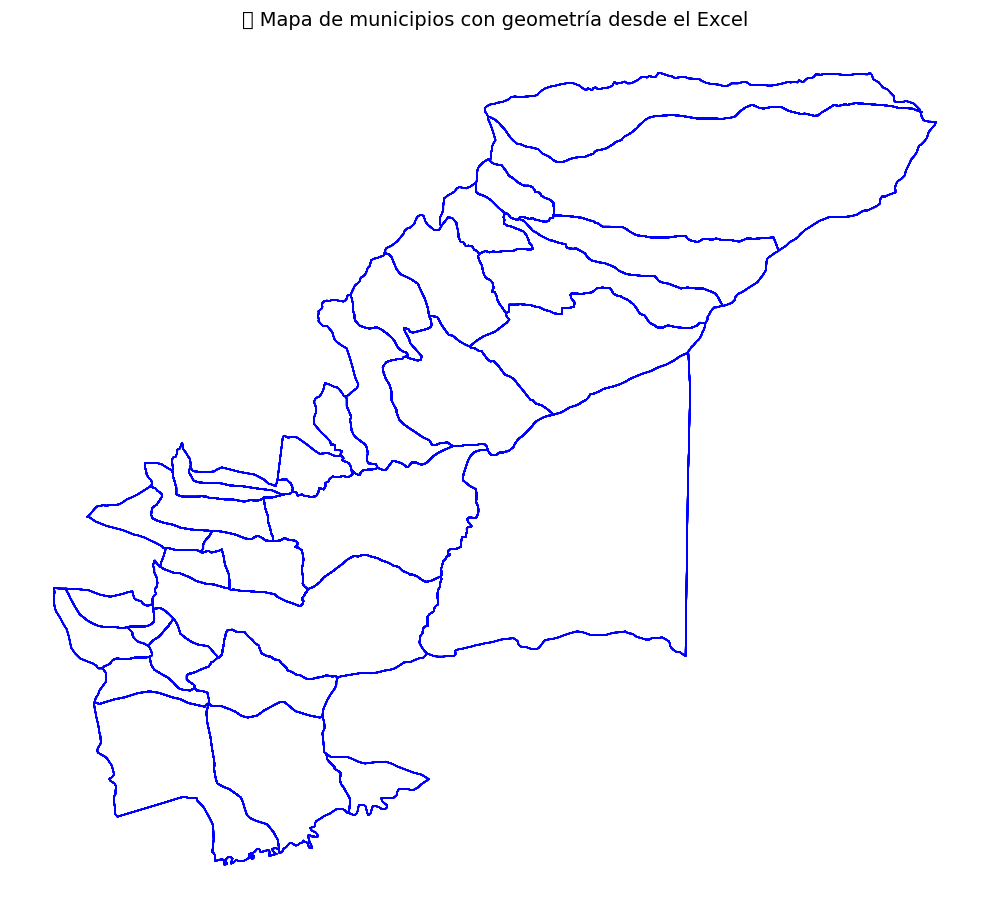

In [25]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar geometr√≠a de los municipios
gdf_final.boundary.plot(ax=ax, color='blue', linewidth=1)

# T√≠tulo y ajustes
ax.set_title('üó∫Ô∏è Mapa de municipios con geometr√≠a desde el Excel', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


## üß© Bloque 1 ‚Äì Paso 1: Verificaci√≥n de geometr√≠a y sistema de referencia (CRS)

Antes de realizar cualquier an√°lisis espacial, es fundamental asegurarse de que el conjunto de datos geoespaciales cumpla con las siguientes condiciones:

- Todas las observaciones deben tener geometr√≠as no nulas.
- Las geometr√≠as deben ser v√°lidas (`Polygon` o `MultiPolygon`).
- El sistema de referencia de coordenadas (CRS) debe estar correctamente definido.

A continuaci√≥n, se ejecutan las validaciones b√°sicas sobre el `GeoDataFrame` resultante del merge entre el Excel de rendimiento y el shapefile de municipios.

```python
# Verificar geometr√≠as nulas
nulas = gdf_final['geometry'].isnull().sum()
print(f"‚ùå Registros con geometr√≠a nula: {nulas} / {len(gdf_final)}")

# Tipos de geometr√≠a presentes
print("\nüìê Tipos √∫nicos de geometr√≠a:")
print(gdf_final.geom_type.value_counts())

# Verificar el CRS
print("\nüó∫Ô∏è CRS actual del GeoDataFrame:")
print(gdf_final.crs)

# Validaci√≥n geom√©trica
print("\n‚úÖ Geometr√≠as v√°lidas:")
print(gdf_final.is_valid.value_counts())


In [26]:
# Verificar cu√°ntas geometr√≠as son nulas
nulas = gdf_final['geometry'].isnull().sum()
print(f"‚ùå Registros con geometr√≠a nula: {nulas} / {len(gdf_final)}")

# Verificar tipos de geometr√≠a
print("\nüìê Tipos √∫nicos de geometr√≠a:")
print(gdf_final.geom_type.value_counts())

# Verificar CRS
print("\nüó∫Ô∏è CRS actual del GeoDataFrame:")
print(gdf_final.crs)

# Mostrar resumen
print("\n‚úÖ Estado de geometr√≠a v√°lida en general:")
print(gdf_final.is_valid.value_counts())


‚ùå Registros con geometr√≠a nula: 0 / 654

üìê Tipos √∫nicos de geometr√≠a:
Polygon    654
Name: count, dtype: int64

üó∫Ô∏è CRS actual del GeoDataFrame:
EPSG:4326

‚úÖ Estado de geometr√≠a v√°lida en general:
True    654
Name: count, dtype: int64


## üß≠ Bloque 1 ‚Äì Paso 2: Construcci√≥n de la matriz de vecindad tipo Queen

La matriz de pesos espaciales tipo Queen se construye a partir del `GeoDataFrame` con geometr√≠a v√°lida. Esta matriz representa las relaciones de vecindad entre los municipios, considerando que dos entidades son vecinas si comparten al menos un v√©rtice o borde.

Para ello se utiliza el m√©todo `Queen.from_dataframe()` del paquete `libpysal`.

```python
from libpysal.weights import Queen
import numpy as np

# Crear la matriz de vecinos tipo Queen
w_queen = Queen.from_dataframe(gdf_final)

# Verificaci√≥n b√°sica
print("‚úÖ N√∫mero de municipios:", len(w_queen.id_order))

# Mostrar algunos municipios con sus vecinos
for i, neighbors in list(w_queen.neighbors.items())[:5]:
    print(f"{gdf_final.iloc[i]['municipio_norm']}: {len(neighbors)} vecinos")

# Verificar si hay municipios sin vecinos
sin_vecinos = np.sum([len(n) == 0 for n in w_queen.neighbors.values()])
print(f"‚ö†Ô∏è Municipios sin vecinos: {sin_vecinos}")


In [27]:
from libpysal.weights import Queen
import numpy as np

# Crear la matriz de vecindad tipo Queen
w_queen = Queen.from_dataframe(gdf_final)

# Ver informaci√≥n b√°sica
print("‚úÖ N√∫mero de municipios:", len(w_queen.id_order))
print("üîó Vecinos por municipio (primeros 5):")
for i, neighbors in list(w_queen.neighbors.items())[:5]:
    print(f" - {gdf_final.iloc[i]['municipio_norm']}: {len(neighbors)} vecinos")

# Comprobaci√≥n: cu√°ntos municipios sin vecinos
sin_vecinos = np.sum([len(neigh) == 0 for neigh in w_queen.neighbors.values()])
print(f"‚ö†Ô∏è Municipios sin vecinos: {sin_vecinos}")


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\2055406357.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_final)


‚úÖ N√∫mero de municipios: 654
üîó Vecinos por municipio (primeros 5):
 - acacias: 85 vecinos
 - acacias: 85 vecinos
 - aguazul: 65 vecinos
 - aguazul: 65 vecinos
 - cabuyaro: 85 vecinos
‚ö†Ô∏è Municipios sin vecinos: 0


C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [28]:
# ¬øCu√°ntas veces aparece cada municipio?
conteo = gdf_final['municipio_norm'].value_counts()
duplicados = conteo[conteo > 1]
print("üìå Municipios duplicados:")
print(duplicados)


üìå Municipios duplicados:
municipio_norm
restrepo                22
vistahermosa            22
villanueva              22
trinidad                22
tauramena               22
san martin              22
san luis de palenque    22
san juan de arama       22
san carlos de guaroa    22
aguazul                 22
puerto lopez            22
puerto lleras           22
yopal                   22
pore                    22
paz de ariporo          22
nunchia                 22
mani                    22
granada                 22
fuente de oro           22
cumaral                 22
castilla la nueva       22
villavicencio           22
orocue                  20
puerto rico             20
acacias                 20
puerto concordia        20
el castillo             20
cabuyaro                20
hato corozal            18
lejanias                16
puerto gaitan           16
Name: count, dtype: int64


In [29]:
from libpysal.weights import Queen

# Crear la matriz de vecindad si no la tienes
w_queen = Queen.from_dataframe(gdf_final)

# Imprimir la representaci√≥n completa del objeto
print(w_queen)


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\1606711605.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_final)


C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [30]:
# Crear DataFrame con municipio y n√∫mero de vecinos
vecinos_df = pd.DataFrame({
    'municipio': [gdf_final.iloc[i]['municipio_norm'] for i in w_queen.neighbors.keys()],
    'n_vecinos': [len(neigh) for neigh in w_queen.neighbors.values()]
})

# Ordenar por n√∫mero de vecinos (descendente)
vecinos_df = vecinos_df.sort_values(by='n_vecinos', ascending=False).reset_index(drop=True)

# Mostrar las primeras filas (puedes ajustar a 10, 20, etc.)
print("üìä Top municipios por n√∫mero de vecinos:")
print(vecinos_df.head(10))


üìä Top municipios por n√∫mero de vecinos:
      municipio  n_vecinos
0  puerto lopez        211
1  puerto lopez        211
2  puerto lopez        211
3  puerto lopez        211
4  puerto lopez        211
5  puerto lopez        211
6  puerto lopez        211
7  puerto lopez        211
8  puerto lopez        211
9  puerto lopez        211


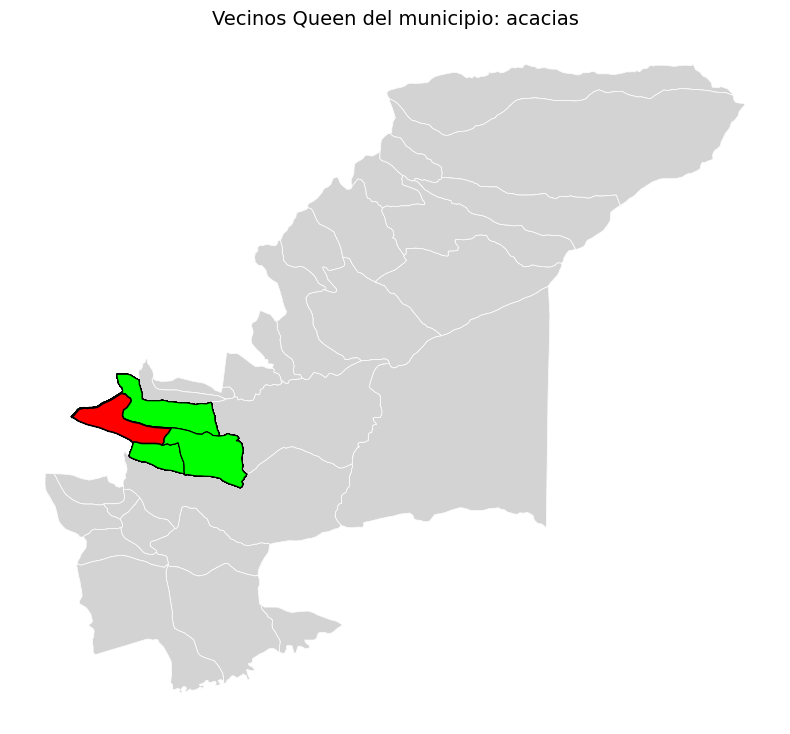

In [31]:
import matplotlib.pyplot as plt

# Nombre del municipio que quieres resaltar
focal_municipio = 'acacias'

# 1. Obtener el √≠ndice del municipio focal en gdf_final
focus_idx = gdf_final[gdf_final['municipio_norm'] == focal_municipio].index[0]

# 2. Obtener lista de √≠ndices vecinos
neighbors_idx = w_queen.neighbors[focus_idx]

# 3. Obtener geometr√≠as
focus = gdf_final.loc[[focus_idx]]
neighbors = gdf_final.loc[neighbors_idx]

# 4. Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Fondo gris
gdf_final.plot(ax=ax, facecolor='lightgrey', edgecolor='white', linewidth=0.5)

# Vecinos en verde
neighbors.plot(ax=ax, facecolor='lime', edgecolor='black', linewidth=0.8)

# Municipio focal en rojo
focus.plot(ax=ax, facecolor='red', edgecolor='black', linewidth=1.2)

# T√≠tulo
ax.set_title(f"Vecinos Queen del municipio: {focal_municipio}", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


In [34]:
# Crear GeoDataFrame con una sola geometr√≠a por municipio
gdf_municipios = gdf_final.dissolve(by='municipio_norm').reset_index()

# Confirmar que ahora los municipios son √∫nicos
print("‚úÖ Total municipios √∫nicos:", gdf_municipios['municipio_norm'].nunique())

# Crear matriz Queen con IDs √∫nicos
from libpysal.weights import Queen
w_queen_named = Queen.from_dataframe(gdf_municipios, idVariable='municipio_norm')

# Ver vecinos de un municipio
print("üîç Vecinos de 'acacias':")
print(w_queen_named['acacias'])


‚úÖ Total municipios √∫nicos: 31
üîç Vecinos de 'acacias':
{'villavicencio': 1.0, 'san carlos de guaroa': 1.0, 'castilla la nueva': 1.0}


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\126103852.py:9: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w_queen_named = Queen.from_dataframe(gdf_municipios, idVariable='municipio_norm')
C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: tauramena.
  W.__init__(self, neighbors, ids=ids, **kw)


In [35]:
# 1. Eliminar 'tauramena' del GeoDataFrame
gdf_municipios = gdf_municipios[~gdf_municipios['municipio_norm'].isin(['tauramena'])].copy()

# 2. Reconstruir la matriz Queen
from libpysal.weights import Queen
w_queen_named = Queen.from_dataframe(gdf_municipios, idVariable='municipio_norm')

# 3. Confirmar que ya no hay islas
print("‚úÖ Islas restantes:", w_queen_named.islands)  # Debe estar vac√≠o


‚úÖ Islas restantes: []


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\1027401218.py:6: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w_queen_named = Queen.from_dataframe(gdf_municipios, idVariable='municipio_norm')


## No es el patr√≥n, es el proceso que determina ese patr√≥n, por qu√© se da, como se da el patr√≥n

## Inter√©s de A GeoE es comprobar hip√≥tesis

## üîç Exploraci√≥n espacial con √çndice de Moran + Modelado espacial ICAR

El objetivo general de este an√°lisis es comprender la distribuci√≥n espacial del rendimiento del arroz en municipios de Meta y Casanare, y modelar la probabilidad de bajo rendimiento incorporando dependencia espacial.

---

### üß≠ Paso 4: C√°lculo del √çndice de Moran Global

Antes de aplicar un modelo espacial, se eval√∫a si existe **autocorrelaci√≥n espacial** en la variable `rendimiento`. Para ello se utiliza el **√çndice de Moran Global**, que mide si los valores similares (altos o bajos) tienden a agruparse en el espacio.

Se usa la matriz de pesos espaciales `Queen` construida previamente (`w_queen_named`) y la variable continua `rendimiento` agregada por municipio.

```python
from esda.moran import Moran

# Calcular promedio de rendimiento por municipio
rend_prom = gdf_final.groupby('municipio_norm')['Rend'].mean().reset_index()
gdf_municipios = gdf_municipios.merge(rend_prom, on='municipio_norm')

# Calcular √çndice de Moran
moran = Moran(gdf_municipios['Rend'], w_queen_named)

print(f"I de Moran: {moran.I:.4f}")
print(f"p-valor (perm): {moran.p_sim:.4f}")


In [36]:
# Normalizar la matriz Queen (convertir pesos a proporciones)
w_queen_named.transform = 'R'


In [37]:
# Comprobaci√≥n: suma de pesos por municipio
suma_pesos = [sum(w_queen_named.weights[m]) for m in w_queen_named.id_order]
print("üîç Suma de pesos por municipio (deben ser 1.0):")
print(suma_pesos[:5])  # primeros 5 municipios


üîç Suma de pesos por municipio (deben ser 1.0):
[1.0, 1.0, 1.0, 1.0, 1.0]


In [38]:
# Normalizar antes de calcular Moran
w_queen_named.transform = 'R'


In [39]:
from esda.moran import Moran

# Asegurarse de que la matriz est√© normalizada
w_queen_named.transform = 'R'

# Calcular el √≠ndice de Moran
moran = Moran(gdf_municipios['Rend'], w_queen_named)

# Mostrar resultados
print("üìä √çndice de Moran Global sobre 'Rendimiento'")
print(f"I de Moran: {moran.I:.4f}")
print(f"Pseudo p-valor (999 permutaciones): {moran.p_sim:.4f}")

# Asegurarse de que sea un escalar, no un array
z_score = moran.z[0] if hasattr(moran.z, '__len__') else moran.z

# Imprimir el z-score con formato
print(f"Z-score: {z_score:.4f}")




üìä √çndice de Moran Global sobre 'Rendimiento'
I de Moran: 0.1623
Pseudo p-valor (999 permutaciones): 0.0720
Z-score: -0.8969


## üß≠ Paso 4: C√°lculo del √çndice de Moran Global sobre 'Rendimiento'

Antes de aplicar un modelo espacial, se evalu√≥ si existe autocorrelaci√≥n espacial en la variable continua `Rend` (rendimiento promedio de arroz por municipio).  
Para ello, se calcul√≥ el **√çndice de Moran Global**, utilizando la matriz de pesos espaciales tipo Queen (normalizada por filas).

### üß™ C√≥digo empleado

```python
from esda.moran import Moran

# Asegurar que la matriz est√© normalizada
w_queen_named.transform = 'R'

# Calcular el √≠ndice de Moran
moran = Moran(gdf_municipios['Rend'], w_queen_named)

# Resultados
print(f"I de Moran: {moran.I:.4f}")
print(f"Pseudo p-valor: {moran.p_sim:.4f}")
print(f"Z-score: {moran.z[0]:.4f}")


üìä √çndice de Moran Global sobre 'Rendimiento'
I de Moran: 0.1623
Pseudo p-valor (999 permutaciones): 0.0720
Z-score: -0.8969

## üìä Interpretaci√≥n del √çndice de Moran Global sobre 'Rendimiento'

Se aplic√≥ el √çndice de Moran Global para evaluar la autocorrelaci√≥n espacial de la variable **Rendimiento**, utilizando una matriz de pesos tipo Queen y 999 permutaciones aleatorias. Los resultados obtenidos fueron los siguientes:

- **I de Moran**: 0.1623  
- **Z-score**: -0.8969  
- **Pseudo p-valor**: 0.0720 (basado en 999 permutaciones)

### üß† An√°lisis

- El valor positivo del **√çndice de Moran** indica una **ligera autocorrelaci√≥n espacial positiva**, lo que sugiere que zonas geogr√°ficas con rendimientos similares tienden a estar agrupadas espacialmente.

- El **pseudo p-valor** de 0.0720 implica que este patr√≥n tiene una **significancia estad√≠stica marginal**, es decir, se podr√≠a considerar significativo al 10%, pero **no al 5%**, lo cual limita la fuerza de la evidencia estad√≠stica.

- El **Z-score negativo**, aunque de baja magnitud (-0.8969), indica que el valor observado est√° por debajo del valor esperado bajo la hip√≥tesis de aleatoriedad.

### ‚úÖ Conclusi√≥n

Aunque no se detecta una autocorrelaci√≥n espacial estad√≠sticamente fuerte, s√≠ se identifica una tendencia leve que justifica la exploraci√≥n de modelos espaciales m√°s sofisticados como el **modelo ICAR**. Esto permitir√° capturar posibles dependencias locales no reflejadas en el an√°lisis global.



In [44]:
import libpysal
import esda

# 1. Crear la matriz de pesos espaciales (vecinos tipo Queen)
w = libpysal.weights.Queen.from_dataframe(gdf_final, use_index=True)

# 1.1 Eliminar islas si existen
if w.islands:
    print(f"Eliminando islas sin vecinos: {w.islands}")
    gdf_final = gdf_final.drop(index=w.islands)
    w = libpysal.weights.Queen.from_dataframe(gdf_final, use_index=True)

w.transform = 'r'  # Normalizar filas

# 2. Extraer la variable de inter√©s (usando el nombre correcto: 'Rend')
y = gdf_final['Rend'].values

# 3. Calcular Moran Local (LISA)
lisa = esda.Moran_Local(y, w)

# 4. (Opcional) Imprimir resumen
print("‚úÖ Moran Local calculado exitosamente.")
print(f"Ejemplo de valores I local: {lisa.Is[:5]}")


C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


‚úÖ Moran Local calculado exitosamente.
Ejemplo de valores I local: [ 0.3034252   0.31724877 -0.00798978 -0.04584424  0.31542063]


In [43]:
import pandas as pd
import geopandas as gpd

# 1Ô∏è‚É£ Leer archivo Excel y mostrar columnas
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords_normalizado.xlsx"
df_excel = pd.read_excel(ruta_excel)

print("üìë Columnas del archivo Excel:")
print(df_excel.columns.tolist())
print("\n")

# 2Ô∏è‚É£ Leer archivo GeoPackage y mostrar columnas
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometr√≠as de GEE\municipios_META_CASANARE_COMPLETO.gpkg"
gdf_gpkg = gpd.read_file(ruta_gpkg)

print("üåç Columnas del archivo GeoPackage:")
print(gdf_gpkg.columns.tolist())
print("\n")

# 3Ô∏è‚É£ Mostrar columnas del GeoDataFrame combinado (gdf_final)
# Aseg√∫rate de haberlo creado antes de este bloque
try:
    print("üß™ Columnas del GeoDataFrame final (gdf_final):")
    print(gdf_final.columns.tolist())
except NameError:
    print("‚ö†Ô∏è El GeoDataFrame 'gdf_final' a√∫n no est√° definido en este entorno.")


üìë Columnas del archivo Excel:
['Departamento', 'Area', 'Rend', 'A√±o', 'Semestre', 'Rend_Cuartil', 'Bajo_Rendimiento', 'municipio_norm', 'semester_GEE', 'precip_accum_mm', 'municipio_fao', 'precipitacion_alta', 'lat', 'lon', 'geometry']


üåç Columnas del archivo GeoPackage:
['ADM1_CODE', 'ADM2_NAME', 'EXP2_YEAR', 'tipo_geom', 'DISP_AREA', 'ADM1_NAME', 'Shape_Leng', 'STATUS', 'ADM0_NAME', 'STR2_YEAR', 'ADM0_CODE', 'Shape_Area', 'ADM2_CODE', 'id', 'geometry']


üß™ Columnas del GeoDataFrame final (gdf_final):
['Departamento', 'Area', 'Rend', 'A√±o', 'Semestre', 'Rend_Cuartil', 'Bajo_Rendimiento', 'municipio_norm', 'semester_GEE', 'precip_accum_mm', 'municipio_fao', 'precipitacion_alta', 'lat', 'lon', 'geometry']


In [45]:
# üß† Mostrar variables definidas actualmente (excluye funciones y m√≥dulos)
def listar_variables():
    variables = {k: v for k, v in globals().items() 
                 if not k.startswith('__') 
                 and not callable(v) 
                 and not isinstance(v, type(listar_variables)) 
                 and not isinstance(v, type(listar_variables.__class__))}
    
    print("üìã Variables actualmente definidas:")
    for nombre, valor in variables.items():
        tipo = type(valor).__name__
        print(f" - {nombre} ({tipo})")

# Llama la funci√≥n
listar_variables()


üìã Variables actualmente definidas:
 - _ih (list)
 - _oh (dict)
 - _dh (list)
 - In (list)
 - Out (dict)
 - _ (str)
 - _i (str)
 - _ii (str)
 - _iii (str)
 - _i1 (str)
 - _i2 (str)
 - gpd (module)
 - geo_vars (dict)
 - _i3 (str)
 - _i4 (str)
 - _i5 (str)
 - _i6 (str)
 - plt (module)
 - fig (Figure)
 - ax (Axes)
 - _i7 (str)
 - pd (module)
 - ruta_excel (str)
 - df (DataFrame)
 - municipios (list)
 - m (str)
 - _i8 (str)
 - ruta_shp (str)
 - gdf (GeoDataFrame)
 - _i9 (str)
 - _i10 (str)
 - _i11 (str)
 - _i12 (str)
 - _i13 (str)
 - mun_shp (set)
 - mun_excel (set)
 - comunes (list)
 - faltantes (list)
 - _i14 (str)
 - _i15 (str)
 - ruta_geojson (str)
 - gdf_tauramena (GeoDataFrame)
 - _i16 (str)
 - _i17 (str)
 - ruta_shp_original (str)
 - gdf_filtrado (GeoDataFrame)
 - gdf_completo (GeoDataFrame)
 - salida (str)
 - _i18 (str)
 - ruta_gpkg (str)
 - gdf_municipios (GeoDataFrame)
 - _i19 (str)
 - _i20 (str)
 - _i21 (str)
 - set_gpkg (set)
 - set_excel (set)
 - sobrantes (list)
 - _i22 (st

In [47]:
import libpysal
import esda
import matplotlib.pyplot as plt

# 1. Crear matriz de pesos espaciales (Queen contiguidad)
w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)
w_lisa.transform = 'r'  # Normaliza los pesos

# 2. Extraer la variable de inter√©s
y = gdf_final['Rend'].values

# 3. Calcular LISA (Moran Local)
lisa = esda.Moran_Local(y, w_lisa)

# 4. Agregar resultados al GeoDataFrame
gdf_final['lisa_I'] = lisa.Is
gdf_final['lisa_p'] = lisa.p_sim
gdf_final['lisa_q'] = lisa.q  # Cuadrante de relaci√≥n espacial
gdf_final['lisa_sig'] = lisa.p_sim < 0.05  # Significancia

# 5. Clasificaci√≥n de cl√∫steres
gdf_final['lisa_cluster'] = 'No significativo'
gdf_final.loc[(gdf_final['lisa_sig']) & (gdf_final['lisa_q'] == 1), 'lisa_cluster'] = 'Alto-Alto'
gdf_final.loc[(gdf_final['lisa_sig']) & (gdf_final['lisa_q'] == 2), 'lisa_cluster'] = 'Bajo-Alto'
gdf_final.loc[(gdf_final['lisa_sig']) & (gdf_final['lisa_q'] == 3), 'lisa_cluster'] = 'Bajo-Bajo'
gdf_final.loc[(gdf_final['lisa_sig']) & (gdf_final['lisa_q'] == 4), 'lisa_cluster'] = 'Alto-Bajo'


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\4189567763.py:6: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)
C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


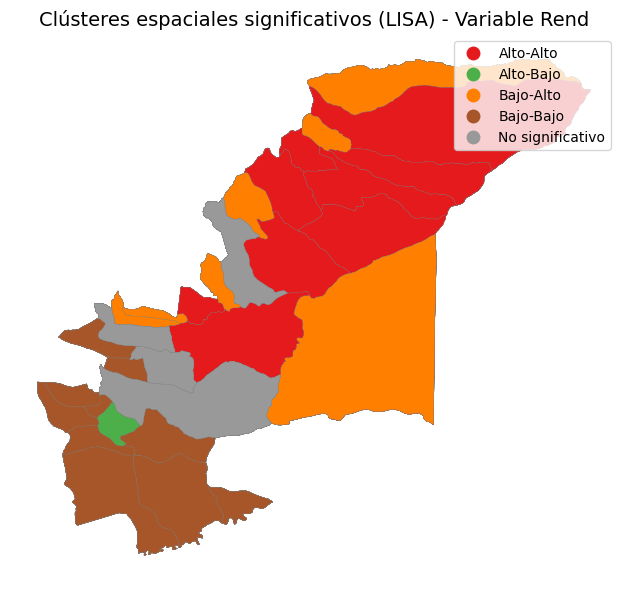

In [48]:
# 6. Mapa de cl√∫steres espaciales LISA
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_final.plot(column='lisa_cluster', categorical=True, legend=True,
               cmap='Set1', linewidth=0.2, edgecolor='gray', ax=ax)

ax.set_title('Cl√∫steres espaciales significativos (LISA) - Variable Rend', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [49]:
# Reutilizar la misma matriz de pesos (Queen)
w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)
w_lisa.transform = 'r'

# Funci√≥n auxiliar para calcular y clasificar LISA
def calcular_lisa(df, variable, sufijo):
    y = df[variable].values
    moran_local = esda.Moran_Local(y, w_lisa)

    # Agregar resultados al GeoDataFrame
    df[f'lisa_I_{sufijo}'] = moran_local.Is
    df[f'lisa_p_{sufijo}'] = moran_local.p_sim
    df[f'lisa_q_{sufijo}'] = moran_local.q
    df[f'lisa_sig_{sufijo}'] = moran_local.p_sim < 0.05

    # Clasificaci√≥n de cl√∫ster
    df[f'lisa_cluster_{sufijo}'] = 'No significativo'
    df.loc[(df[f'lisa_sig_{sufijo}']) & (df[f'lisa_q_{sufijo}'] == 1), f'lisa_cluster_{sufijo}'] = 'Alto-Alto'
    df.loc[(df[f'lisa_sig_{sufijo}']) & (df[f'lisa_q_{sufijo}'] == 2), f'lisa_cluster_{sufijo}'] = 'Bajo-Alto'
    df.loc[(df[f'lisa_sig_{sufijo}']) & (df[f'lisa_q_{sufijo}'] == 3), f'lisa_cluster_{sufijo}'] = 'Bajo-Bajo'
    df.loc[(df[f'lisa_sig_{sufijo}']) & (df[f'lisa_q_{sufijo}'] == 4), f'lisa_cluster_{sufijo}'] = 'Alto-Bajo'

# Calcular para las dos variables
calcular_lisa(gdf_final, 'Bajo_Rendimiento', 'br')
calcular_lisa(gdf_final, 'precipitacion_alta', 'pa')


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\3252836755.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)
C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [50]:
# Seleccionar columnas clave para exportar
columnas_exportar = [
    'municipio_norm', 'Departamento',
    'Bajo_Rendimiento', 'lisa_I_br', 'lisa_p_br', 'lisa_cluster_br',
    'precipitacion_alta', 'lisa_I_pa', 'lisa_p_pa', 'lisa_cluster_pa'
]

# Exportar como CSV
gdf_final[columnas_exportar].to_csv('resultados_lisa_bajoR_precipitacion.csv', index=False)


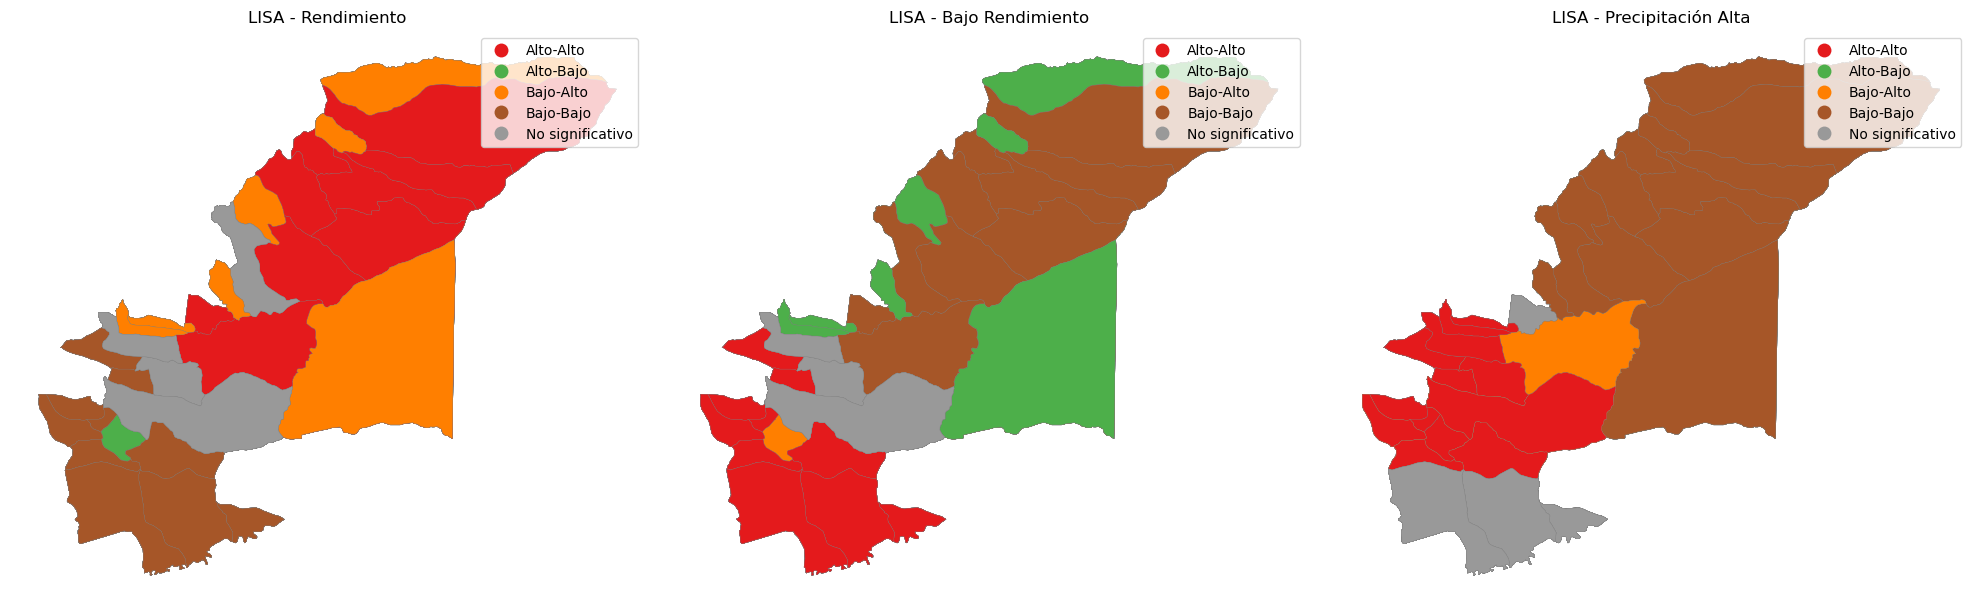

In [51]:
import matplotlib.pyplot as plt

# Configurar colores consistentes
cmap = 'Set1'

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Mapa 1 - Rendimiento
gdf_final.plot(column='lisa_cluster', categorical=True, legend=True, cmap=cmap,
               linewidth=0.2, edgecolor='gray', ax=axes[0])
axes[0].set_title('LISA - Rendimiento')
axes[0].axis('off')

# Mapa 2 - Bajo Rendimiento
gdf_final.plot(column='lisa_cluster_br', categorical=True, legend=True, cmap=cmap,
               linewidth=0.2, edgecolor='gray', ax=axes[1])
axes[1].set_title('LISA - Bajo Rendimiento')
axes[1].axis('off')

# Mapa 3 - Precipitaci√≥n Alta
gdf_final.plot(column='lisa_cluster_pa', categorical=True, legend=True, cmap=cmap,
               linewidth=0.2, edgecolor='gray', ax=axes[2])
axes[2].set_title('LISA - Precipitaci√≥n Alta')
axes[2].axis('off')

plt.tight_layout()
plt.show()


## üß≠ Interpretaci√≥n de cl√∫steres espaciales LISA (√çndice de Moran Local)

Este an√°lisis identifica patrones espaciales significativos de tres variables clave mediante el √≠ndice de Moran Local (LISA), permitiendo detectar **agrupamientos espaciales** o **valores at√≠picos** en el territorio.

### üìå Variables analizadas
- **`Rend`**: Rendimiento agr√≠cola continuo.
- **`Bajo_Rendimiento`**: Variable binaria que indica si el rendimiento es bajo seg√∫n un umbral (por ejemplo, cuartiles).
- **`precipitacion_alta`**: Variable binaria que indica niveles altos de precipitaci√≥n acumulada.

---

### üó∫Ô∏è Tipos de cl√∫steres LISA

| Cl√∫ster         | Descripci√≥n |
|----------------|-------------|
| **Alto-Alto**   | Zonas con valores altos rodeadas de zonas altas (agrupamiento positivo). |
| **Bajo-Bajo**   | Zonas con valores bajos rodeadas de zonas bajas (agrupamiento negativo). |
| **Alto-Bajo**   | Valor alto rodeado de valores bajos (valor at√≠pico). |
| **Bajo-Alto**   | Valor bajo rodeado de valores altos (valor at√≠pico). |
| **No significativo** | No hay evidencia estad√≠stica de autocorrelaci√≥n espacial. |

---

### üß† Interpretaci√≥n por variable

#### 1. `Rend` (Rendimiento agr√≠cola continuo)
- Se detectan algunos cl√∫steres **Alto-Alto** en regiones de buen desempe√±o productivo, lo que sugiere **agrupamiento de alta productividad**.
- Tambi√©n aparecen cl√∫steres **Bajo-Bajo**, que evidencian **zonas persistentes de baja productividad** agr√≠cola.
- La presencia de **valores at√≠picos (Alto-Bajo o Bajo-Alto)** puede deberse a condiciones agroclim√°ticas locales, infraestructura o intervenci√≥n t√©cnica.

#### 2. `Bajo_Rendimiento` (Variable binaria)
- Los cl√∫steres **Bajo-Bajo** indican **bolsas territoriales de bajo rendimiento**, y podr√≠an reflejar **problemas estructurales** compartidos (como acceso a tecnolog√≠a, suelos pobres o debilidad institucional).
- Los cl√∫steres **Alto-Alto** indican zonas donde el bajo rendimiento es poco com√∫n (inverso), lo que puede se√±alar **focos exitosos en territorios vulnerables**.

#### 3. `precipitacion_alta` (Variable binaria)
- Los cl√∫steres **Alto-Alto** indican regiones donde la alta precipitaci√≥n se **concentra espacialmente**, lo cual puede tener **efectos positivos o negativos** sobre el rendimiento seg√∫n el contexto (inundaciones o disponibilidad h√≠drica).
- Los cl√∫steres **Bajo-Bajo** podr√≠an asociarse con **zonas cr√≥nicamente secas o con d√©ficit h√≠drico**.

---

### üîé Implicaciones del an√°lisis

- El an√°lisis LISA permite **identificar regiones prioritarias** para intervenci√≥n t√©cnica, adaptaci√≥n clim√°tica o inversi√≥n en infraestructura.
- Comparar los cl√∫steres entre las tres variables ayuda a explorar **relaciones espaciales entre rendimiento agr√≠cola y clima**.
- Este enfoque tambi√©n puede orientar pol√≠ticas p√∫blicas basadas en evidencia territorial, ayudando a focalizar recursos en zonas con **din√°micas espaciales cr√≠ticas**.

---

### üìÇ Archivo exportado
Se gener√≥ un archivo `resultados_lisa_bajoR_precipitacion.csv` con los valores de Moran Local, p-valores y tipo de cl√∫ster para cada municipio y cada variable.



In [52]:
# ¬øHay autocorrelaci√≥n local significativa en Bajo_Rendimiento?
gdf_final['lisa_sig_br'].sum()


588

In [53]:
w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\1712006422.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)
C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [54]:
# Exportar como GeoPackage
gdf_final.to_file("data_final.gpkg", driver="GPKG")


## üß† Modelo Espacial ICAR en R con INLA

Para modelar los efectos espaciales en los rendimientos del arroz se utiliz√≥ un modelo ICAR (Intrinsic Conditional AutoRegressive Model) usando la librer√≠a `INLA` en R. El procedimiento se realiz√≥ de la siguiente manera:

---

### üîπ Paso 1: Preparaci√≥n de los datos

Desde Python, se export√≥ el GeoDataFrame final (`gdf_final`) como un archivo GeoPackage:

```python
gdf_final.to_file("C:/Users/paola/Analisis Geoespacial/Proyecto_01/data_final.gpkg", driver="GPKG")

library(sf)
library(spdep)
library(sp)

# Leer datos desde el GeoPackage
gdf <- st_read("C:/Users/paola/Analisis Geoespacial/Proyecto_01/data_final.gpkg")

# Conversi√≥n a objeto Spatial
gdf_sp <- as_Spatial(gdf)

# Creaci√≥n de vecinos tipo Queen
nb <- poly2nb(gdf_sp, queen = TRUE)

# Revisi√≥n de islas (pol√≠gonos sin vecinos)
islas <- which(card(nb) == 0)
if (length(islas) > 0) {
  print(paste("‚ö†Ô∏è Islas encontradas sin vecinos:", paste(islas, collapse = ", ")))
}

# Crear archivo de estructura espacial para INLA
nb2INLA("vecinos.graph", nb)


In [55]:
# Mostrar las primeras 15 filas del GeoDataFrame
gdf_final.head(15)


Departamento    Area      Rend   A√±o Semestre Rend_Cuartil  \
0          Meta   620.0  0.050757  2013        I         Bajo   
1          Meta   620.0  0.036582  2013       II         Bajo   
2      Casanare  6358.6  0.343188  2013        I         Bajo   
3      Casanare  6358.6  0.307771  2013       II         Bajo   
4          Meta  7572.1  0.619896  2013        I   Medio-Alto   
5          Meta  7572.1  0.446774  2013       II   Medio-Alto   
6          Meta  2749.3  0.225074  2013        I         Bajo   
7          Meta  2749.3  0.162216  2013       II         Bajo   
8          Meta  2575.0  0.210804  2013        I         Bajo   
9          Meta  2575.0  0.151932  2013       II         Bajo   
10         Meta   425.5  0.034834  2013        I         Bajo   
11         Meta   425.5  0.025106  2013       II         Bajo   
12         Meta  8533.8  0.698626  2013        I   Medio-Alto   
13         Meta  8533.8  0.503517  2013       II   Medio-Alto   
14         Meta  2383.0  0.195086  2013        I         Bajo   

    Bajo_Rendimiento     municipio_norm semester_GEE  precip_accum_mm  ...  \
0                  1            acacias          1-6      1771.063271  ...   
1                  1            acacias         7-12      1895.331576  ...   
2                  1            aguazul          1-6       921.609069  ...   
3                  1            aguazul         7-12      1235.895755  ...   
4                  0           cabuyaro          1-6      1231.824421  ...   
5                  0           cabuyaro         7-12      1500.886187  ...   
6                  1  castilla la nueva          1-6      1727.064321  ...   
7                  1  castilla la nueva         7-12      1823.308982  ...   
8                  1            cumaral          1-6      1637.431760  ...   
9                  1            cumaral         7-12      2033.282068  ...   
10                 1        el castillo          1-6      1822.586310  ...   
11                 1        el castillo         7-12      1764.959169  ...   
12                 0      fuente de oro          1-6      1589.336111  ...   
13                 0      fuente de oro         7-12      1596.277315  ...   
14                 1            granada          1-6      1720.915433  ...   

   lisa_I_br  lisa_p_br  lisa_q_br  lisa_sig_br lisa_cluster_br  lisa_I_pa  \
0   0.222441      0.002          1         True       Alto-Alto   0.989506   
1   0.222441      0.002          1         True       Alto-Alto   0.989506   
2  -0.408966      0.001          4         True       Alto-Bajo   0.392898   
3  -0.408966      0.001          4         True       Alto-Bajo   0.392898   
4   0.287147      0.017          3         True       Bajo-Bajo   0.047483   
5   0.287147      0.017          3         True       Bajo-Bajo  -0.122413   
6   0.598106      0.001          1         True       Alto-Alto   0.854728   
7   0.598106      0.001          1         True       Alto-Alto   0.854728   
8  -0.190791      0.014          4         True       Alto-Bajo   0.517783   
9  -0.190791      0.014          4         True       Alto-Bajo   0.517783   
10  0.497057      0.001          1         True       Alto-Alto   0.886717   
11  0.497057      0.001          1         True       Alto-Alto   0.886717   
12 -0.444087      0.001          2         True       Bajo-Alto   0.697038   
13 -0.444087      0.001          2         True       Bajo-Alto   0.697038   
14  0.171298      0.011          1         True       Alto-Alto   0.929790   

    lisa_p_pa  lisa_q_pa  lisa_sig_pa   lisa_cluster_pa  
0       0.001          1         True         Alto-Alto  
1       0.001          1         True         Alto-Alto  
2       0.001          3         True         Bajo-Bajo  
3       0.001          3         True         Bajo-Bajo  
4       0.274          3        False  No significativo  
5       0.188          4        False  No significativo  
6       0.001          1         True         Alto-Alto  

## Modelo ICAR binomial con dependencia espacial

Se ajust√≥ un modelo binomial con efectos espaciales tipo ICAR (modelo de Leroux) para estimar la probabilidad de bajo rendimiento agr√≠cola en municipios de Meta y Casanare. Se usaron como variables predictoras:

- √Årea cultivada (`Area`)
- Precipitaci√≥n acumulada (`precip_accum_mm`)
- Semestre (`Semestre`)
- Umbral de precipitaci√≥n alta (`precipitacion_alta`)
- Departamento (`Departamento`)
- A√±o (`A√±o`)

### Principales resultados:
- El modelo captura efectos espaciales relevantes en la ocurrencia de bajo rendimiento.
- La visualizaci√≥n espacial permite identificar patrones regionales.

Este modelo puede ser utilizado para generar alertas o decisiones basadas en riesgo en tiempo futuro.


# üìä Interpretaci√≥n de Resultados - Modelos Espaciales

## 1. üî∑ Modelo ICAR Binomial (Probabilidad de Bajo Rendimiento)

### üìå Medidas de ajuste:
- **DIC:** 138.34  
- **WAIC:** 149.23  
- **loglikelihood:** -10.68  
- **p.d (par√°metros efectivos):** 58.48  
- **LMPL:** -77.97

### üß† Interpretaci√≥n:
- El modelo logra capturar parte de la variabilidad en la probabilidad de bajo rendimiento, pero el ajuste no es perfecto.
- Los valores altos de DIC y WAIC indican que hay margen de mejora.
- El alto n√∫mero de par√°metros efectivos sugiere que el modelo es complejo o incluye variables redundantes.
- El mapa muestra √∫nicamente dos colores, lo cual sugiere que:
  - La variable binaria est√° **muy desbalanceada**.
  - Las variables predictoras no logran separar bien los casos.

---

## 2. üî∑ Modelo ICAR Gaussiano (Rendimiento Continuo)

### üìå Medidas de ajuste:
- **DIC:** -506.83  
- **WAIC:** -518.38  
- **loglikelihood:** 373.75  
- **p.d:** 120.33  
- **LMPL:** 255.06

### üß† Interpretaci√≥n:
- El modelo tiene **muy buen ajuste**: DIC y WAIC negativos, y loglikelihood alto.
- Explica bien la variabilidad del rendimiento agr√≠cola.
- El n√∫mero de par√°metros es alto, pero no penaliza el ajuste.
- Se espera que el mapa generado represente adecuadamente zonas con mayor o menor rendimiento. El error en el mapa se debi√≥ a que la variable `resid_icar_gauss` no fue agregada correctamente como vector num√©rico.

---

## 3. üî∑ Modelo GWR (Regresi√≥n Ponderada Geogr√°ficamente)

### üìå Coeficientes locales:

| Variable              | M√≠nimo      | Mediana     | M√°ximo      | Global     |
|----------------------|-------------|-------------|-------------|------------|
| Intercepto           | -0.0425     | 0.1119      | 0.7416      | -0.0597    |
| Precipitaci√≥n acum.  | -0.00025    | -0.00006    | 0.00011     | 0.0001     |
| Precipitaci√≥n alta   | -0.1629     | 0.0014      | 0.0946      | -0.0262    |
| √Årea sembrada        | 1.69e-05    | 7.28e-05    | 1.26e-04    | 0.0000     |

### üìå Residuales:
- **Mediana:** -0.0018  
- **Media:** 0.0008  
- **M√°ximo:** 0.44

### üß† Interpretaci√≥n:
- Los efectos de las variables **var√≠an espacialmente**.
- En algunas zonas:
  - M√°s lluvia = menor rendimiento; en otras, m√°s lluvia = mejor rendimiento.
  - "Precipitaci√≥n alta" puede ser positiva o negativa, dependiendo del contexto local.
- √Årea sembrada tiene un efecto consistentemente positivo, pero d√©bil.
- Los **errores son peque√±os y centrados en cero**, lo cual indica buen ajuste.
- El modelo GWR es muy √∫til para hacer recomendaciones o interpretaciones **locales** por municipio.

---

## üìå Conclusi√≥n

- **GWR** permite detectar zonas donde los efectos son m√°s intensos y espec√≠ficos.
- **ICAR Gaussiano** tiene el **mejor ajuste global** y es √∫til para predicci√≥n general.
- **ICAR Binomial** necesita mejoras:
  - Redefinir la variable de respuesta (por ejemplo, usar "muy bajo rendimiento").
  - Incluir nuevas variables como **temperatura**.

---



In [60]:
municipios_unicos = gdf_final['municipio_norm'].unique()
print(list(municipios_unicos))


['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral', 'el castillo', 'fuente de oro', 'granada', 'mani', 'nunchia', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto lleras', 'puerto lopez', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san luis de palenque', 'san martin', 'tauramena', 'trinidad', 'villanueva', 'villavicencio', 'vistahermosa', 'yopal', 'orocue', 'puerto rico', 'hato corozal', 'lejanias', 'puerto gaitan']


In [61]:
import geopandas as gpd

# Aseg√∫rate de que 'municipio_norm' est√© en min√∫sculas (como en la lista)
municipios_objetivo = [
  'acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral',
  'el castillo', 'fuente de oro', 'granada', 'mani', 'nunchia',
  'paz de ariporo', 'pore', 'puerto concordia', 'puerto lleras',
  'puerto lopez', 'restrepo', 'san carlos de guaroa', 'san juan de arama',
  'san luis de palenque', 'san martin', 'tauramena', 'trinidad',
  'villanueva', 'villavicencio', 'vistahermosa', 'yopal', 'orocue',
  'puerto rico', 'hato corozal', 'lejanias', 'puerto gaitan'
]

# Filtrar del gdf_final solo esos municipios
gdf_export = gdf_final[gdf_final['municipio_norm'].isin(municipios_objetivo)]

# Eliminar duplicados si hay varias geometr√≠as por municipio‚Äìa√±o‚Äìsemestre
gdf_export_unico = gdf_export[['municipio_norm', 'geometry']].drop_duplicates()

# Exportar a GeoJSON o SHP (elige uno)
gdf_export_unico.to_file("municipios_para_GEE.geojson", driver="GeoJSON")
# o si prefieres shapefile:
# gdf_export_unico.to_file("municipios_para_GEE.shp")
